In [1]:
# Import relevant packages

import uproot # conda install -c conda-forge uproot
import vector # conda install -c conda-forge vector
import awkward as ak
import numpy as np
import matplotlib.pyplot as plt
import math
import json
plt.style.use('seaborn-v0_8-colorblind')

In [2]:
plt.rcParams.update({'font.size': 20,
                    'xtick.labelsize' : 40,
                    'ytick.labelsize' : 40,
                    'xtick.major.size' : 10,
                    'ytick.major.size' : 10,
                    'xtick.minor.size' : 5,
                    'ytick.minor.size' : 5,
                    'axes.labelsize' : 50,
                    'axes.titlesize' : 50}) 

In [3]:
data=json.load(open("/Users/isaac/Desktop/10TeVMCDataAnalysis/doubleLayerFiltering/doubleLayerHits.json"))

In [4]:
print(data.keys())

dict_keys(['BIB/negZTheta', 'BIB/posZTheta', 'BIB/barTheta', 'BIB/negZPhi', 'BIB/posZPhi', 'BIB/barPhi', 'noBIB/negZTheta', 'noBIB/posZTheta', 'noBIB/barTheta', 'noBIB/negZPhi', 'noBIB/posZPhi', 'noBIB/barPhi'])


In [5]:
# a handy plotting function
def plot1DHistogram(data,bins,scale='linear',label="", savefig=False, dpi=300):
    
    # handle data, there must be a smarter way to do this...
    if type(data[0])==np.int64 : data_flat=data
    elif type(data[0])==np.float32 : data_flat=data
    elif type(data[0])==np.float64 : data_flat=data
    else: data_flat = ak.flatten(data)
    
    fig = plt.figure(figsize=(30,20))
    ax = fig.add_subplot(111)
    
    ax.hist(data_flat, bins=bins)
    
    # handle labels
    title  = "" if len(label.split(";")) < 1 else label.split(";")[0]  
    xlabel = "" if len(label.split(";")) < 2 else label.split(";")[1]  
    ylabel = "" if len(label.split(";")) < 3 else label.split(";")[2] 
    
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.yscale(scale)
    if savefig:
        plt.savefig(title + ".png", dpi=dpi)
    plt.show()

In [6]:
# a handy plotting function
def plot2DHistogram(datax, datay, bins=100, norm="log", label="", savefig=False, dpi=300):
    
    data_flatx = np.array(np.ravel(datax)).T
    data_flaty = np.array(np.ravel(datay)).T
    #print(len(data_flatx),data_flatx)
    #print(len(data_flaty),data_flaty)
    
    fig = plt.figure(figsize=(30,20))
    ax = fig.add_subplot(111)
    
    hh = ax.hist2d(data_flatx, data_flaty, bins=bins, norm=norm, cmap="plasma")
    
    title  = "" if len(label.split(";")) < 1 else label.split(";")[0]  
    xlabel = "" if len(label.split(";")) < 2 else label.split(";")[1]  
    ylabel = "" if len(label.split(";")) < 3 else label.split(";")[2]  
    zlabel = "" if len(label.split(";")) < 4 else label.split(";")[3] 
    
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    
    # colorbars are annoying
    cbar = fig.colorbar(hh[3])
    #cbar.ax.tick_params(labelsize=tick_font_size)
    cbar.set_label(zlabel, fontsize=15)

    if savefig:
        plt.savefig(title + ".png", dpi=dpi)
    plt.show()

In [7]:
for i in range(4):
    print(len(data["noBIB/barPhi"][i]))
    print(len(data["noBIB/barTheta"][i]))
for i in range(4):
    print(len(data["noBIB/posZPhi"][i]))
    print(len(data["noBIB/posZTheta"][i]))
for i in range(4):
    print(len(data["noBIB/negZPhi"][i]))
    print(len(data["noBIB/negZTheta"][i]))

129
129
109
109
37
37
18
18
755
755
601
601
495
495
384
384
72
72
62
62
44
44
25
25


In [8]:
print(data["noBIB/barPhi"][0])

[1.1803503996876685e-05, 0.00010471290786395748, 5.186250978383988e-05, 1.0387504908004885e-05, -0.00021575964667075453, -9.44092253563067e-06, -4.041204602733828e-06, 6.2796321147994e-05, 0.00034842336882234815, 3.231827409555521e-05, -4.333759093488876e-05, -1.4855929628243558e-05, 0.00016991603150562362, -5.800392826338374e-05, 0.00015476022986238291, 2.1821661043697205e-06, 0.00013135714969347845, 0.0003751196135384216, -2.8131161287969775e-05, 2.9708520317139886e-05, 0.0005091356847941597, -2.4196540818532952e-05, 4.251975947222597e-06, -0.00030727015868370344, 0.00036824529853729526, 0.00015849092672981513, -0.000300985353580252, 0.00016921926093038664, 0.00016839638658372458, -5.63764180672166e-07, 0.0003144797892588036, -1.4658295706126978e-05, 0.0003184001797209568, -0.0002840260799277239, -1.4646681698593511e-06, 9.396530640426448e-05, 0.00013931647581855167, -0.0002487997364692962, 0.00016511227381910132, -3.951642749466799e-06, 5.466555296956832e-05, -5.2971190003248125e-06

In [17]:
print(data["BIB/posZPhi"][0])

[-0.004559425480348267, -0.0024578270104957944, 0.0022982418007990724, -0.0024578270104957944, 0.0015288298158711022, 0.004075839083559352, -0.008166893392570262, 0.004972130678129627, -0.004753357605152553, 0.004972130678129627, -0.0055073003677854615, -0.004250825799105851, 0.005346263736321077, 0.0021785926638080433, -0.0014990375729184435, 0.0005478260095699294, -0.0008762179270380699, -0.0012464681705860459, -0.0020604369002619194, -0.0012464681705860459, -0.0018493067803917462, -0.0007875283980409709, -0.0003199123835702089, 0.00930030092649306, -0.00419908159092508, 0.004015450427558687, -0.005578467618868932, -0.0028808291811085462, 0.009632705620768178, -0.000651058055364917, -0.0009121239206633103, 0.003557402550922628, -0.0022351086708550794, -0.0010591945988960294, 0.0023650003795552266, -0.0016748368605181696, -0.00014038612317568422, -0.006727059407724223, 0.007725113469054801, -0.004289707455244152, -0.005845721530622683, 0.008028499888856011, 0.008028499888856011, -0.00

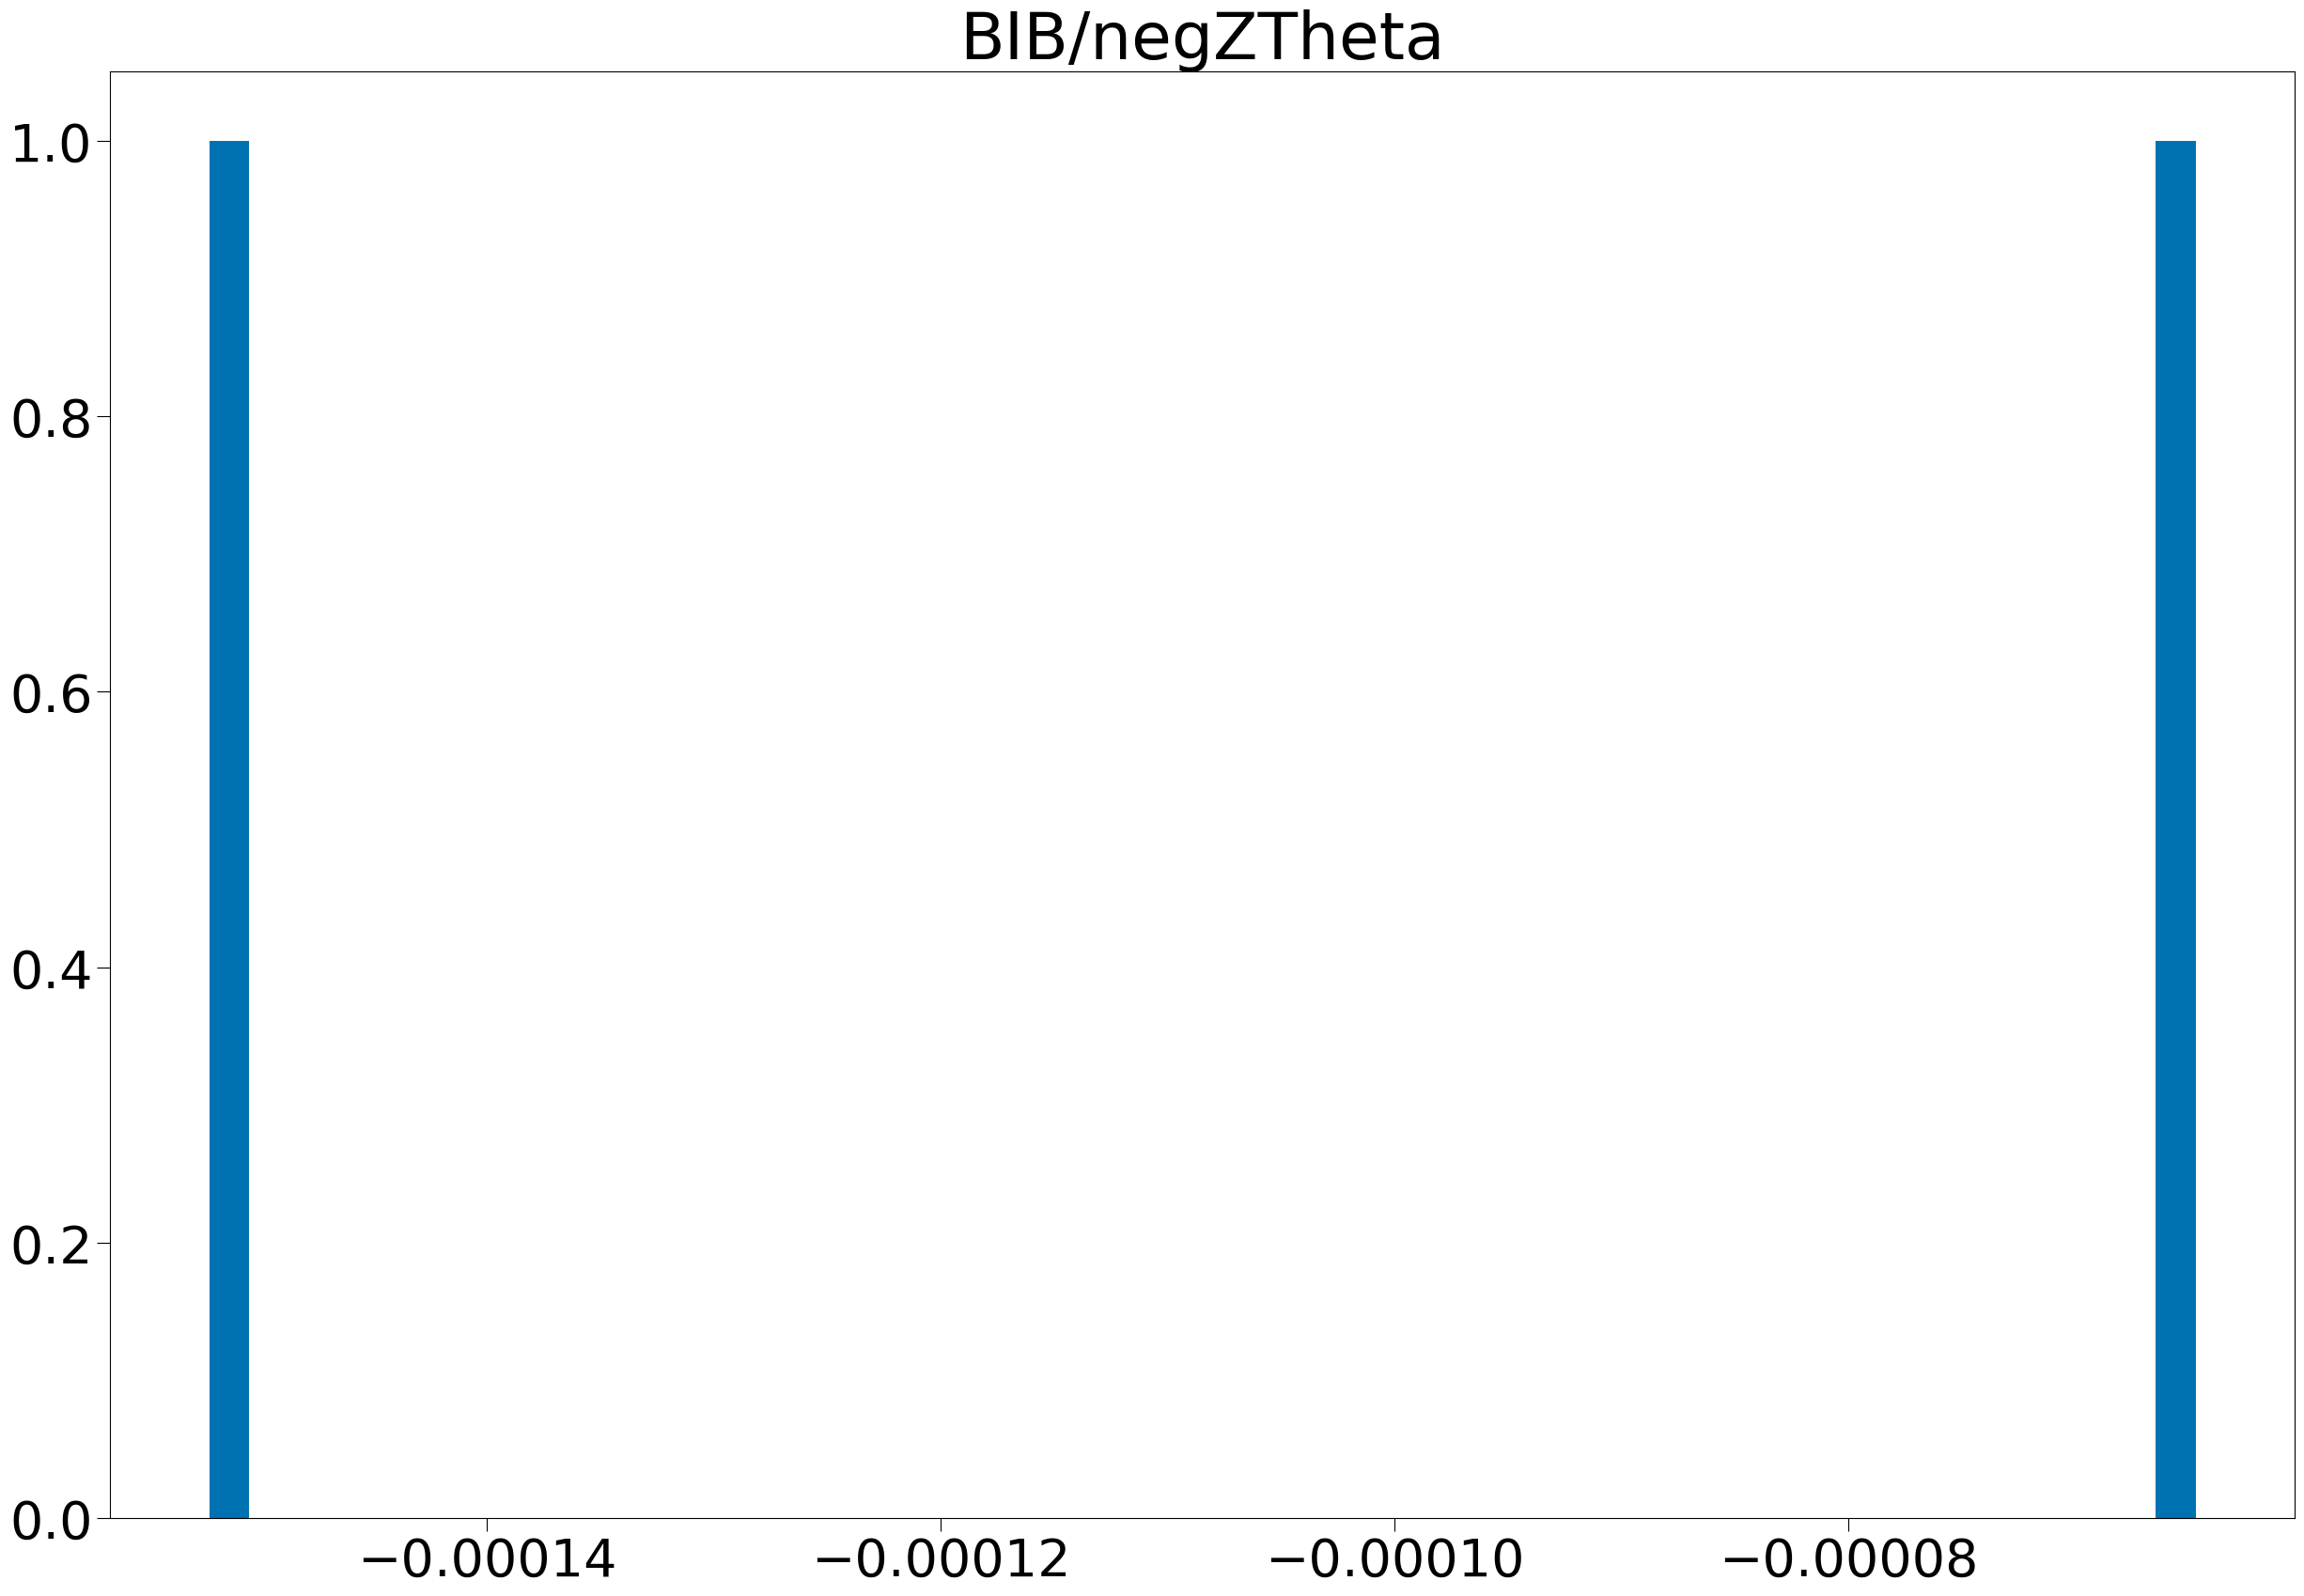

1
1
0
0


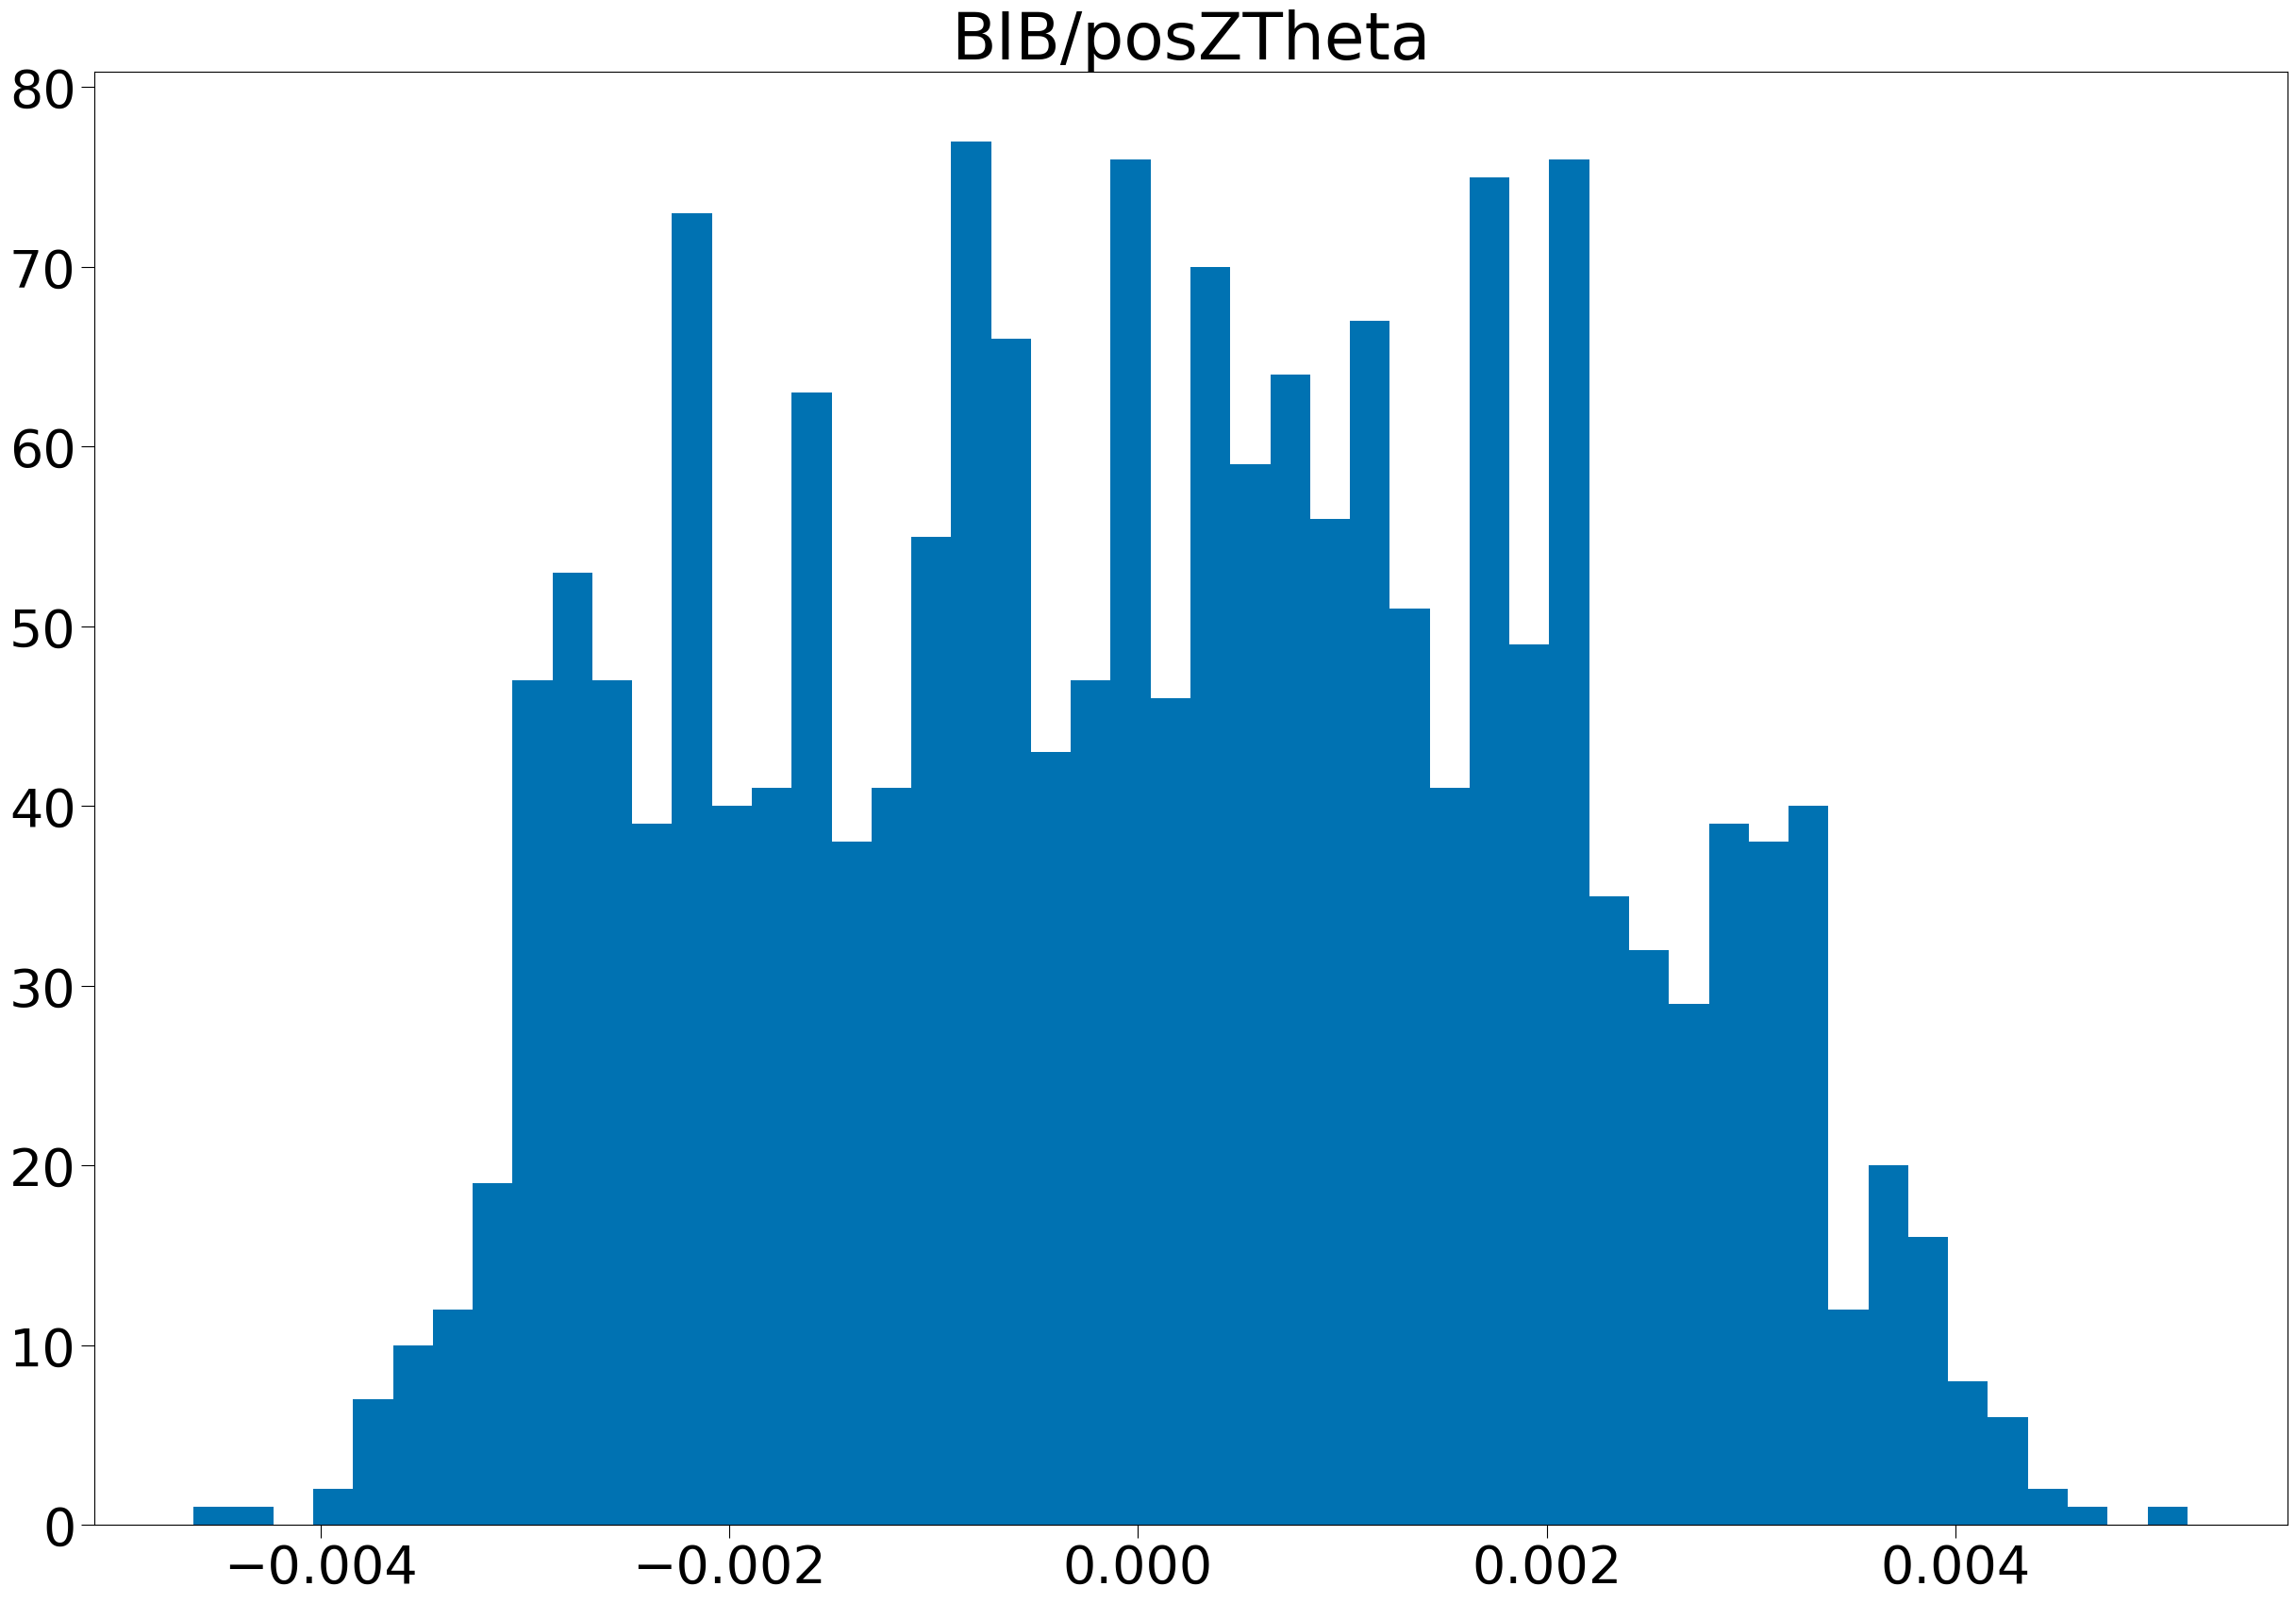

1789
41
0
1


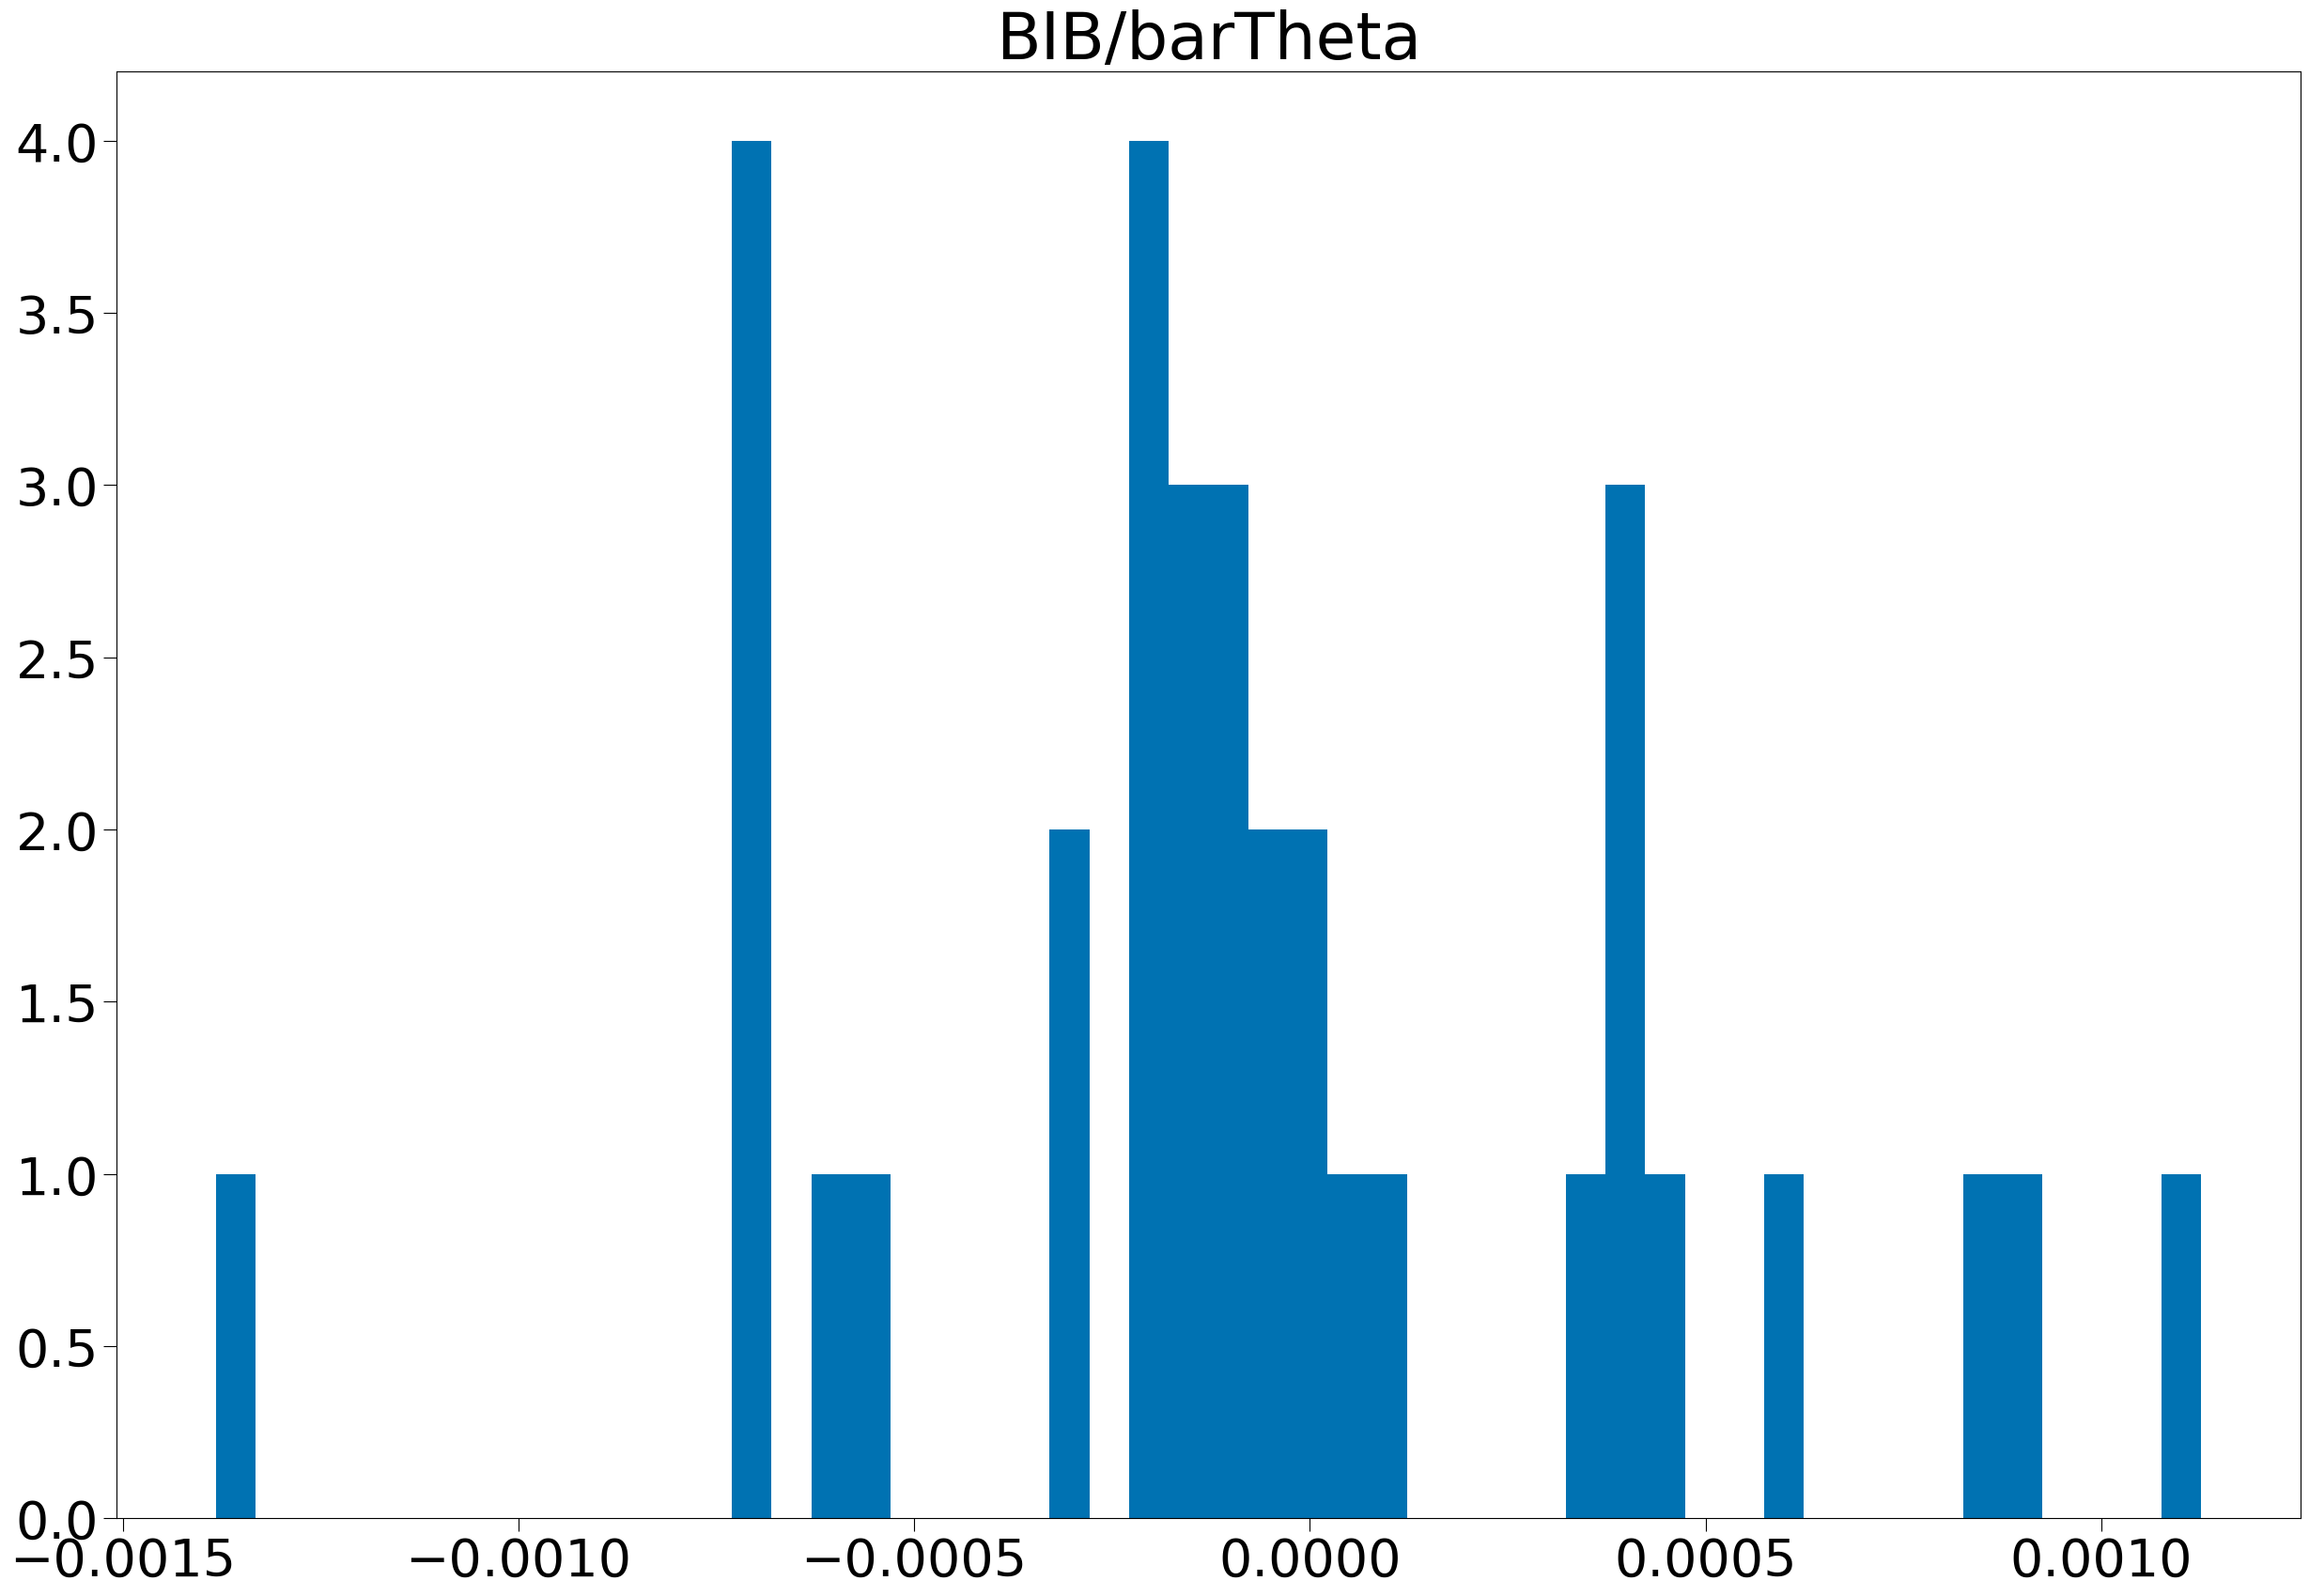

20
14
0
0


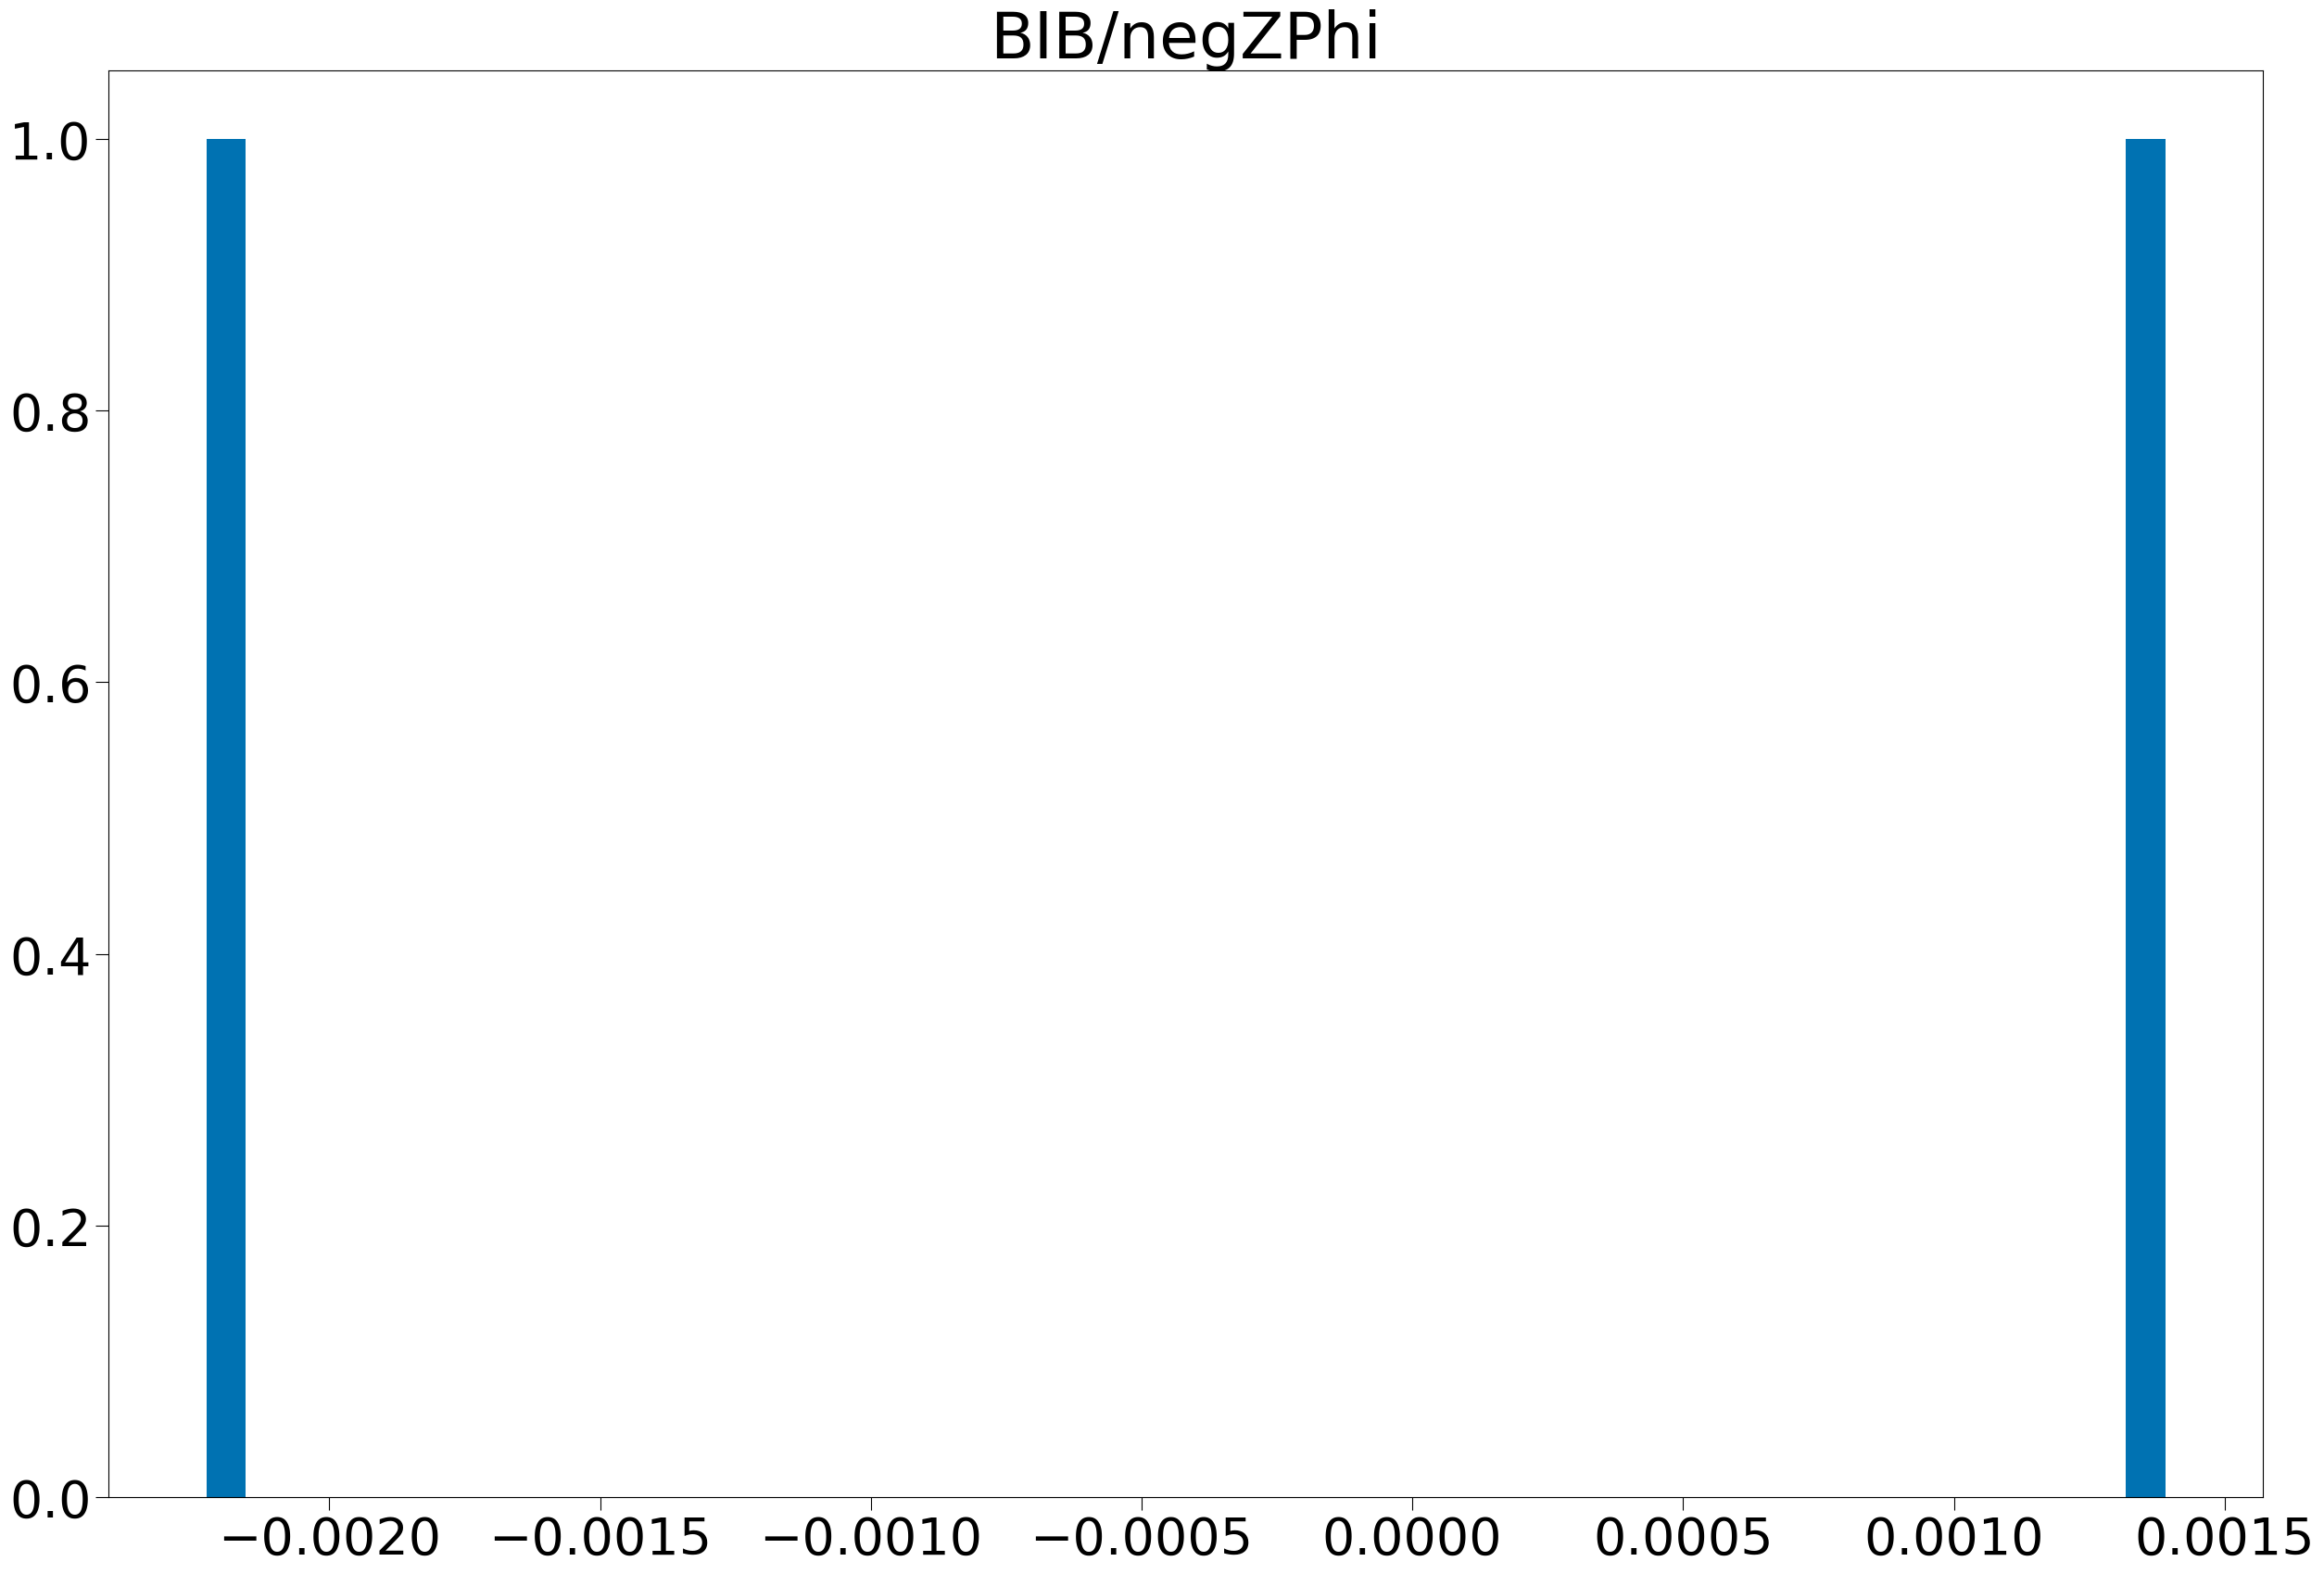

1
1
0
0


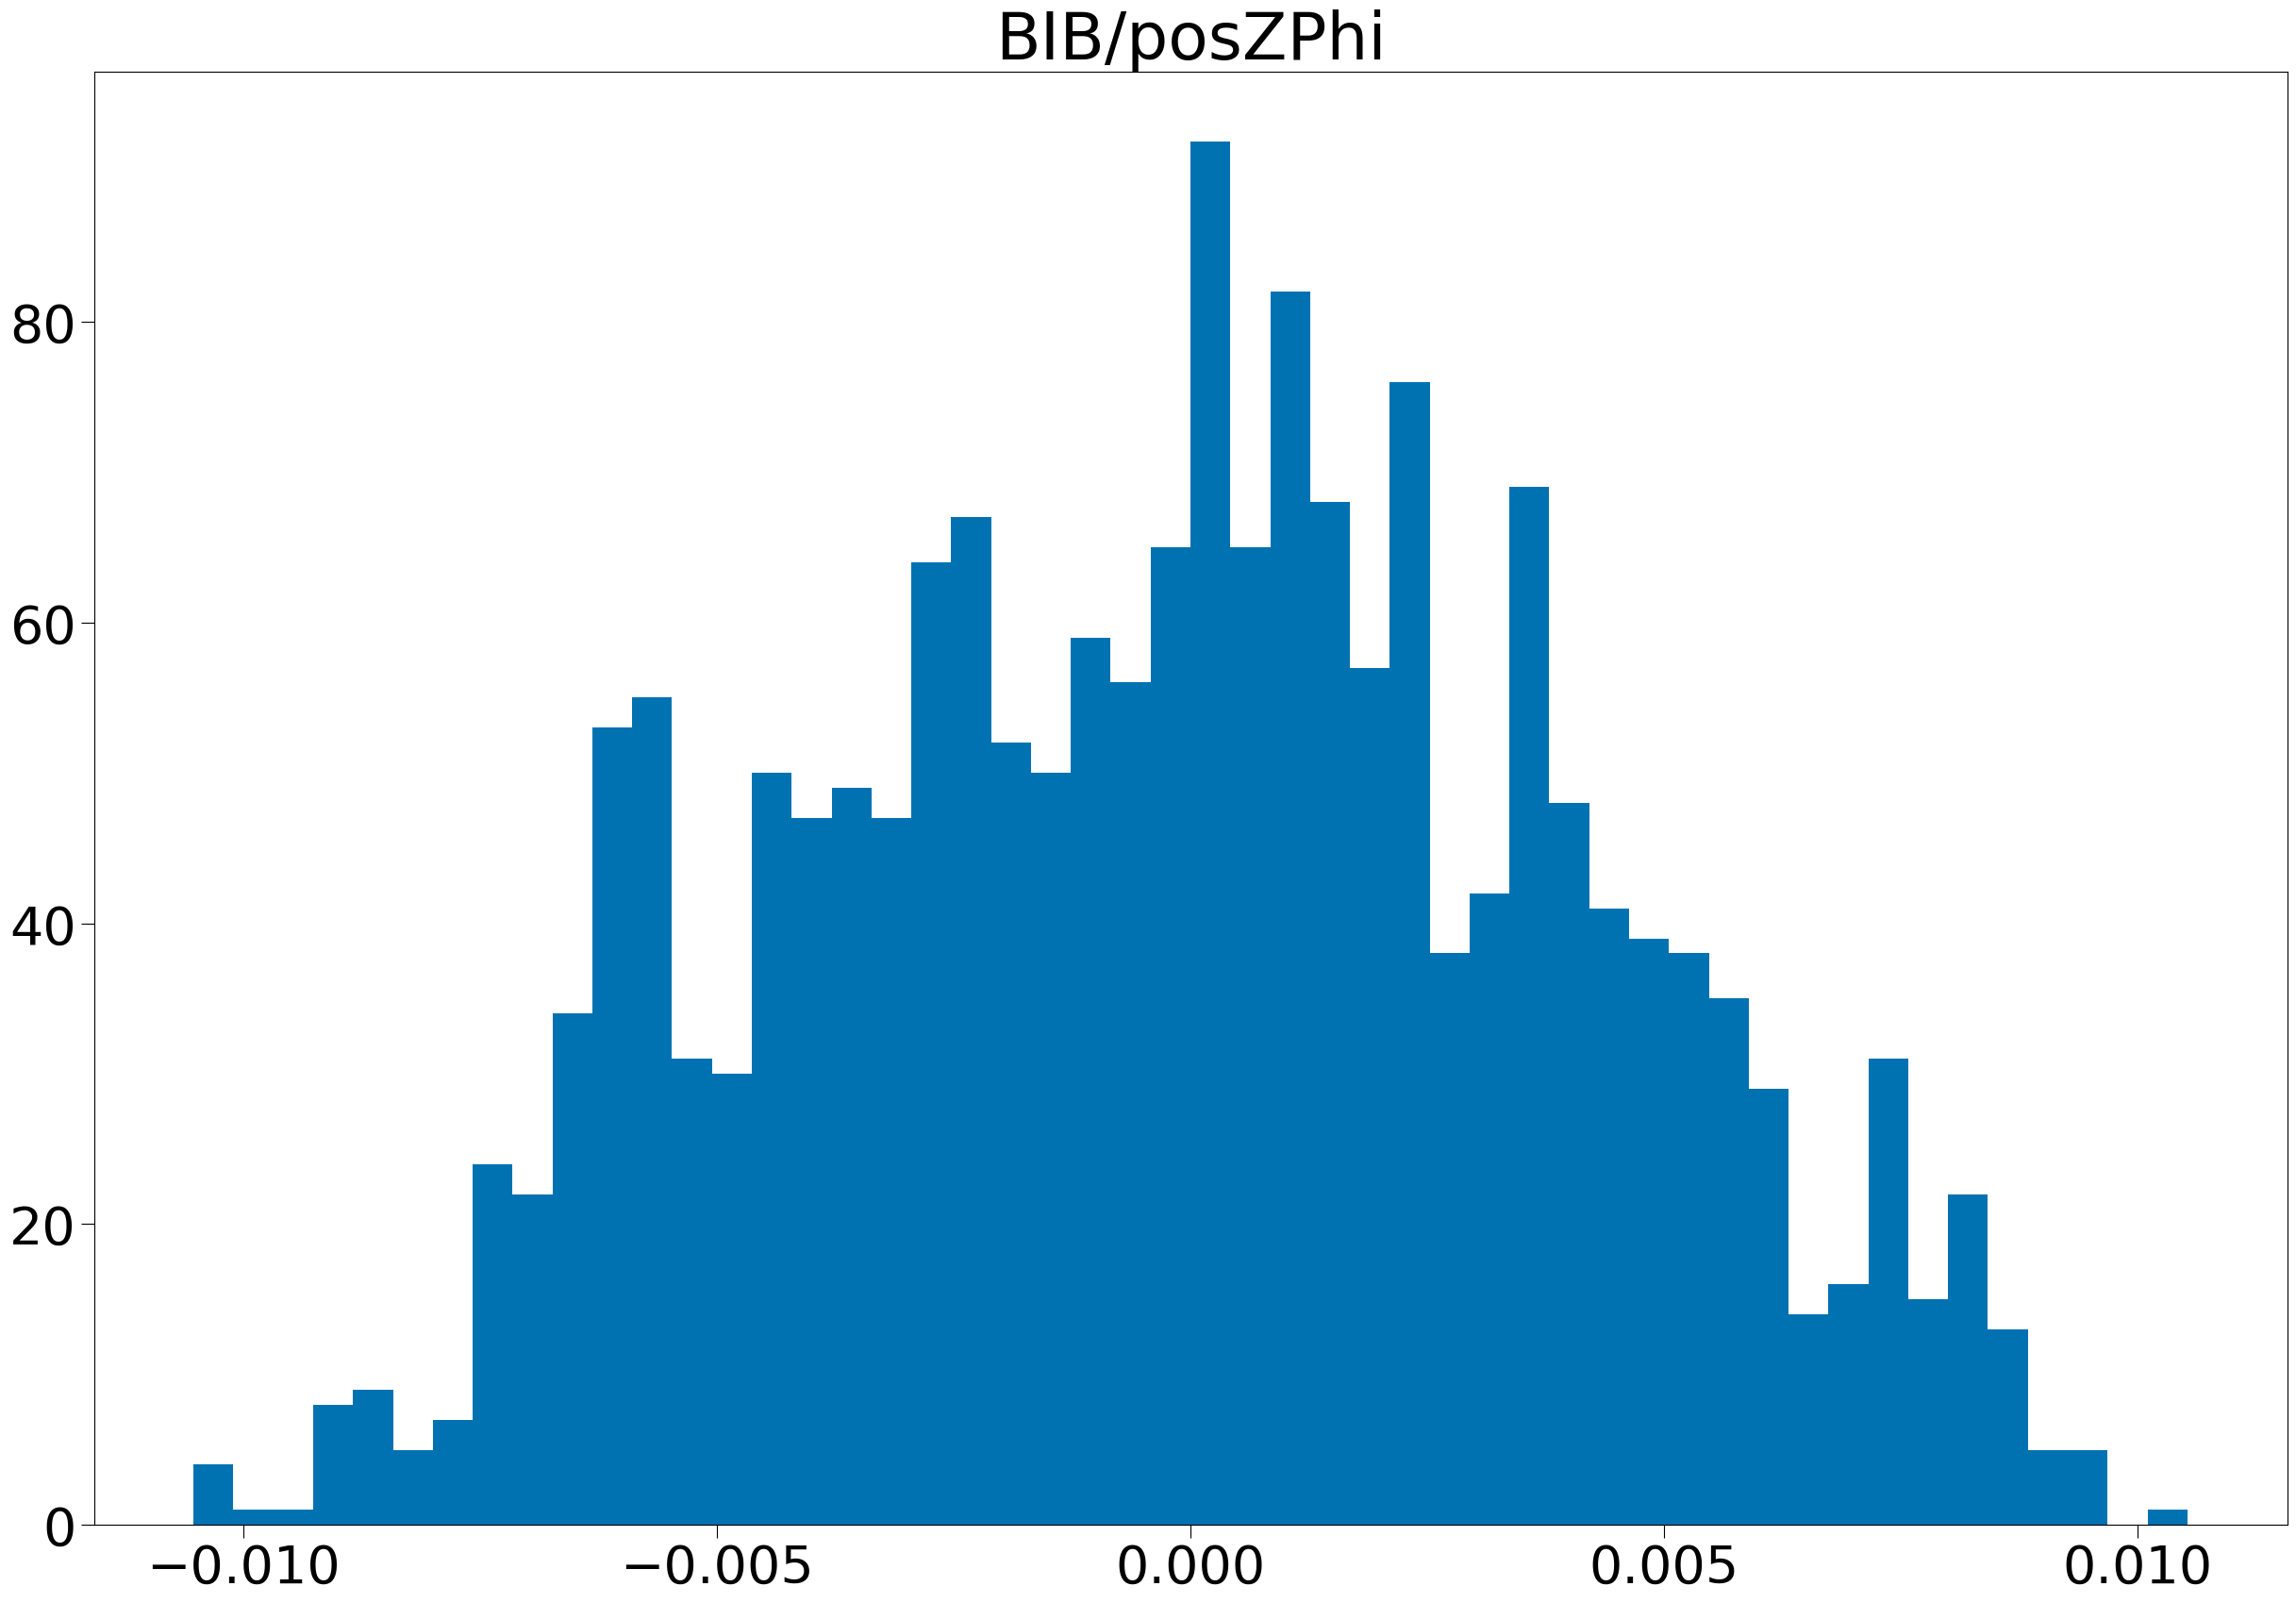

1789
41
0
1


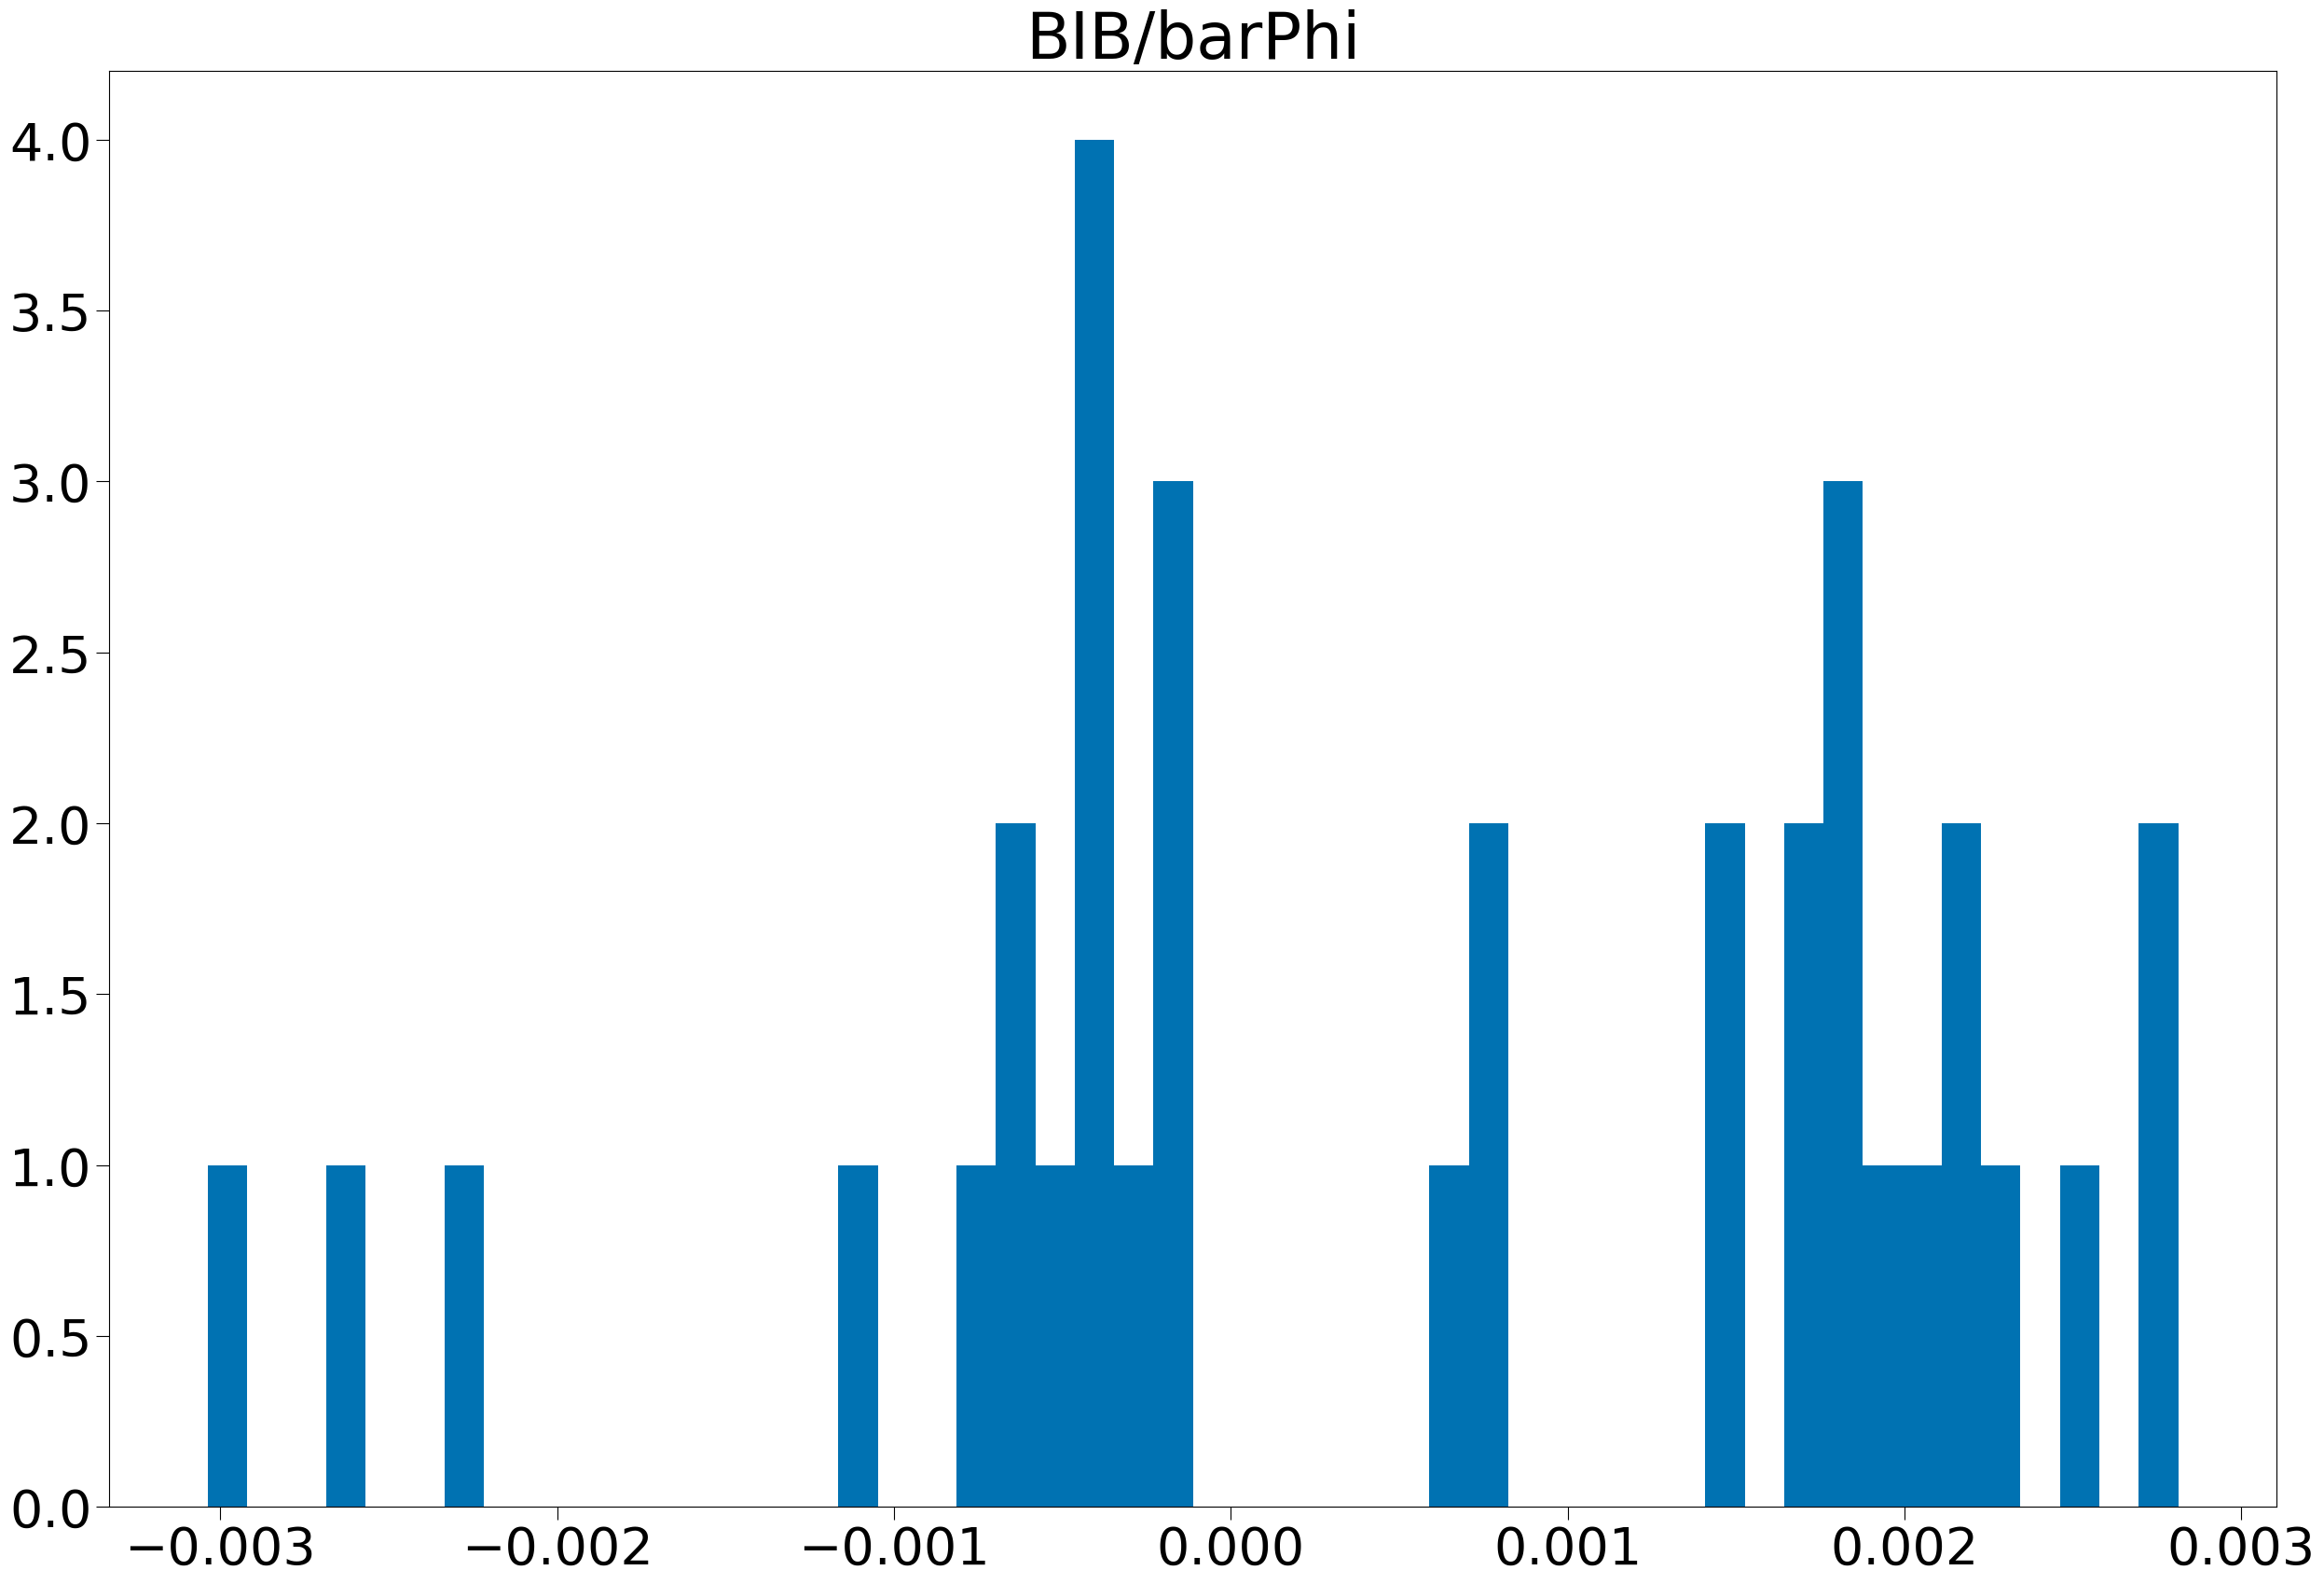

20
14
0
0


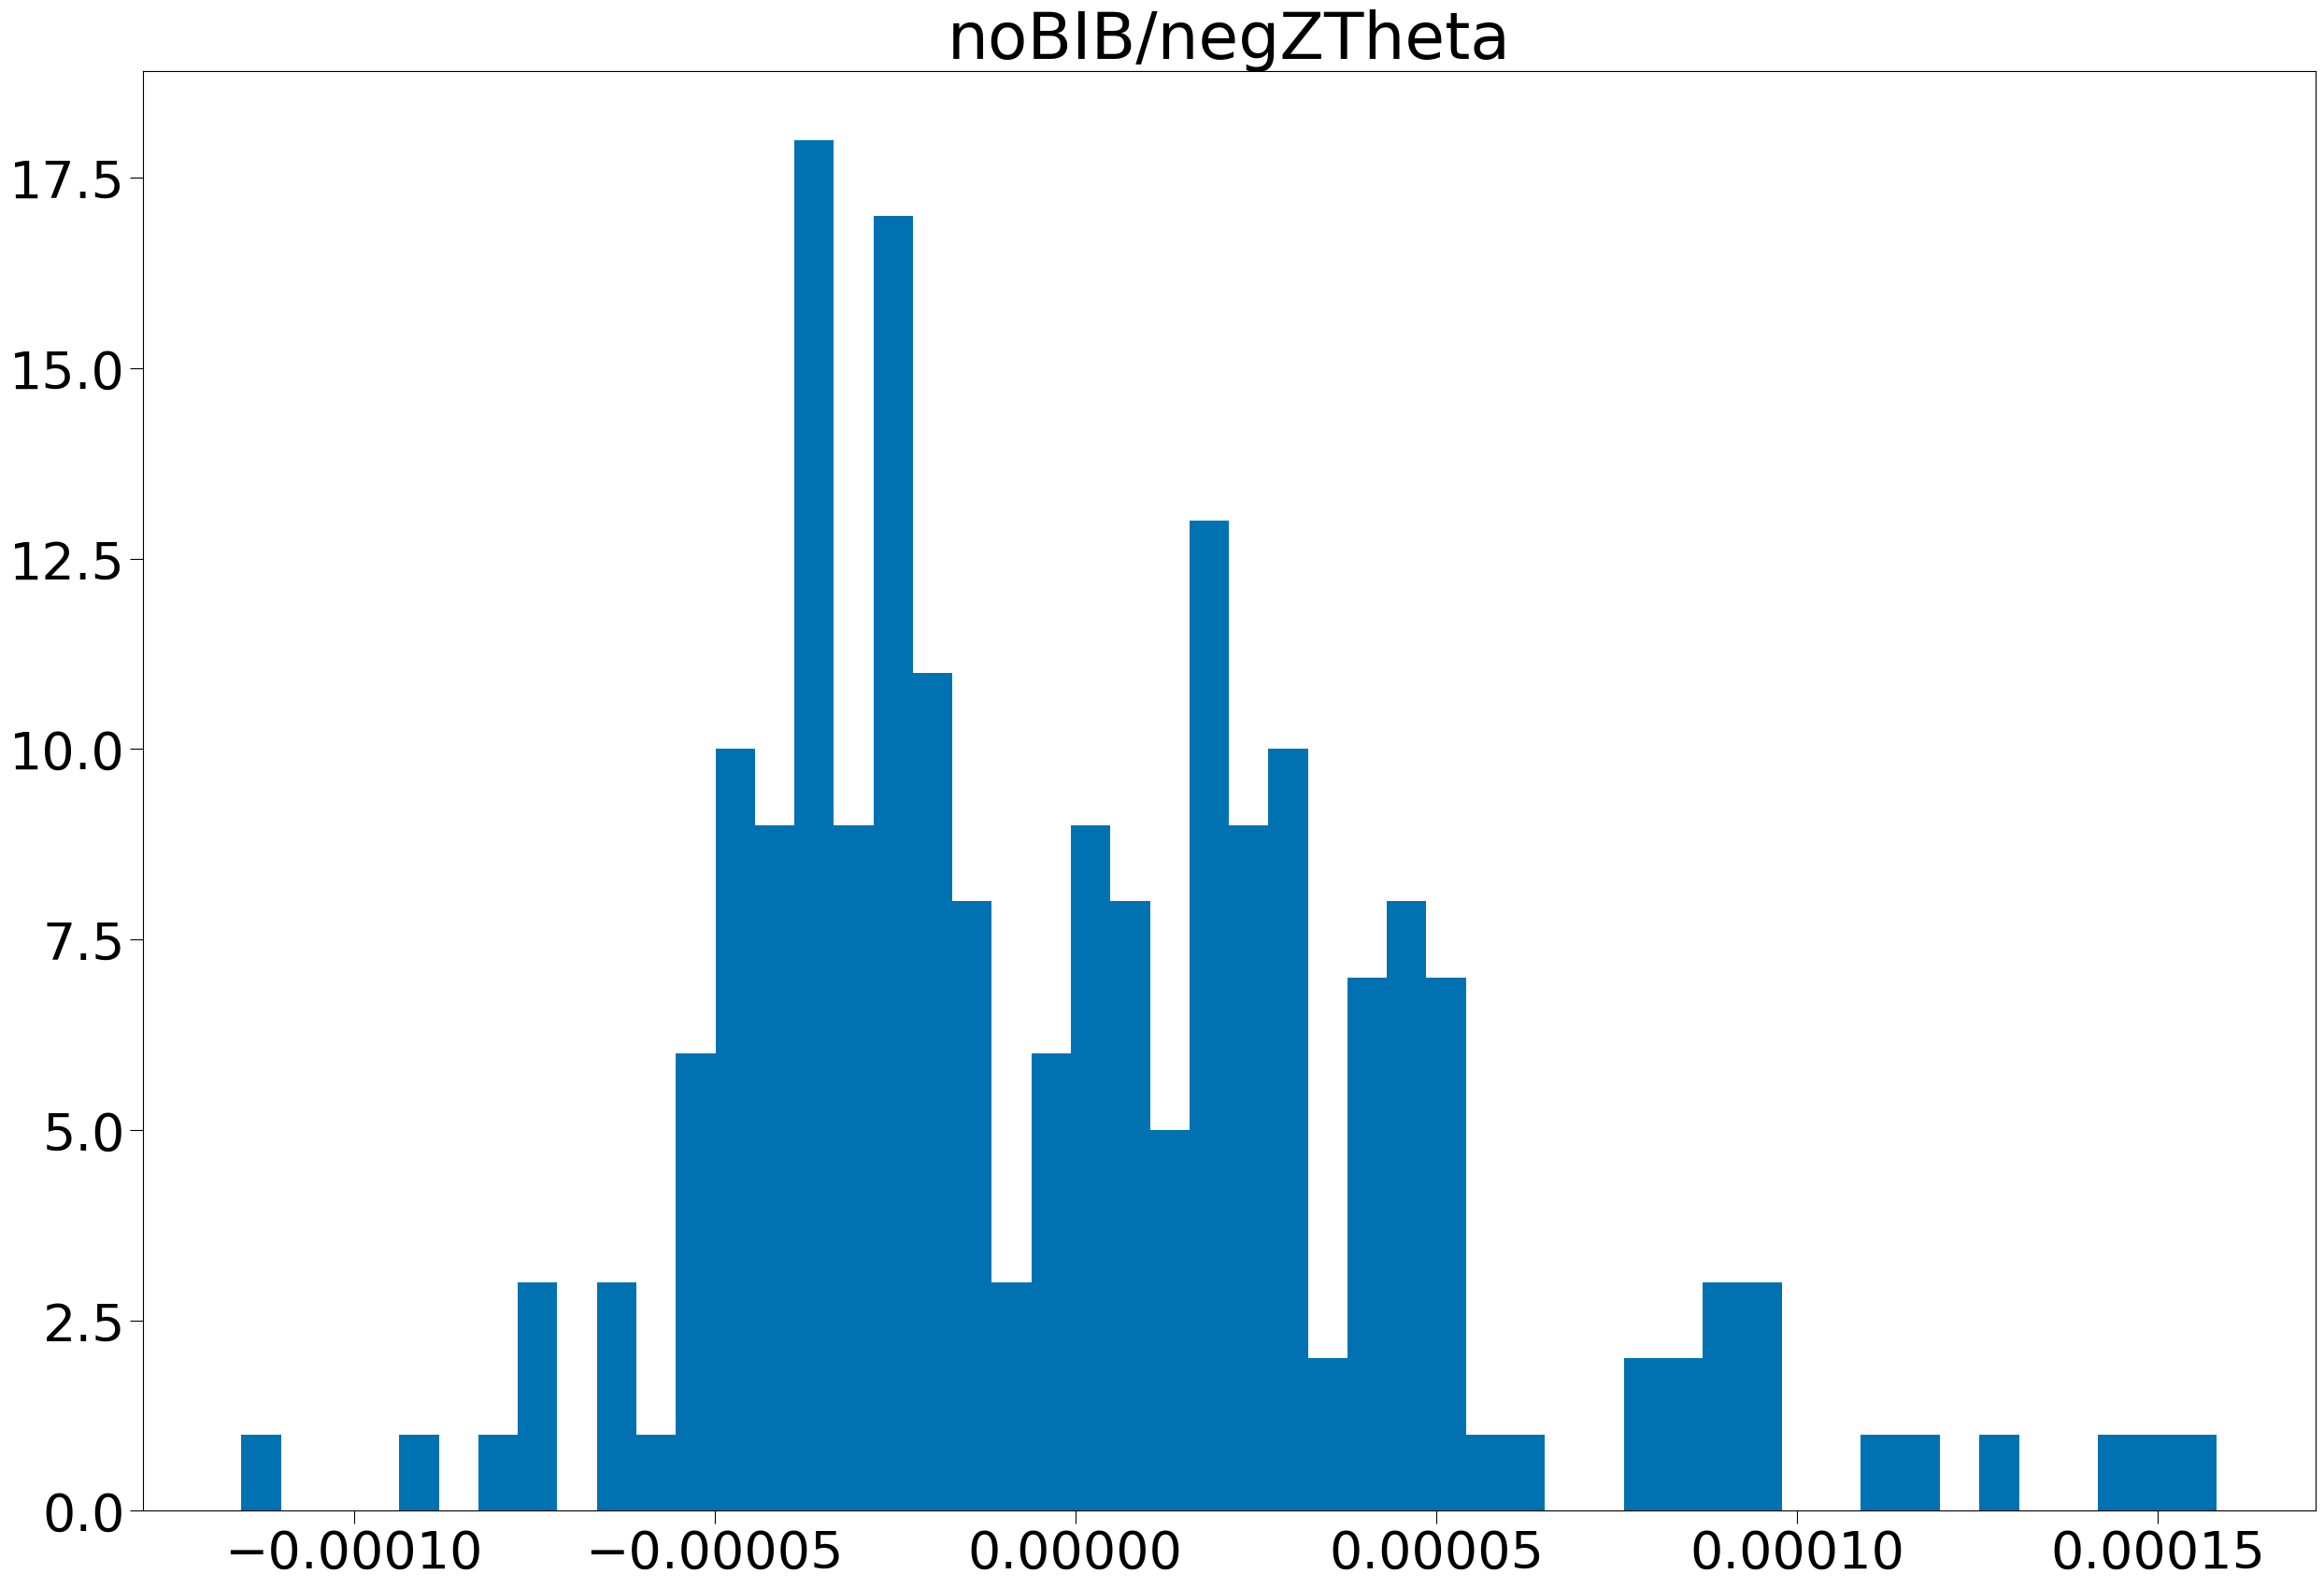

72
62
44
25


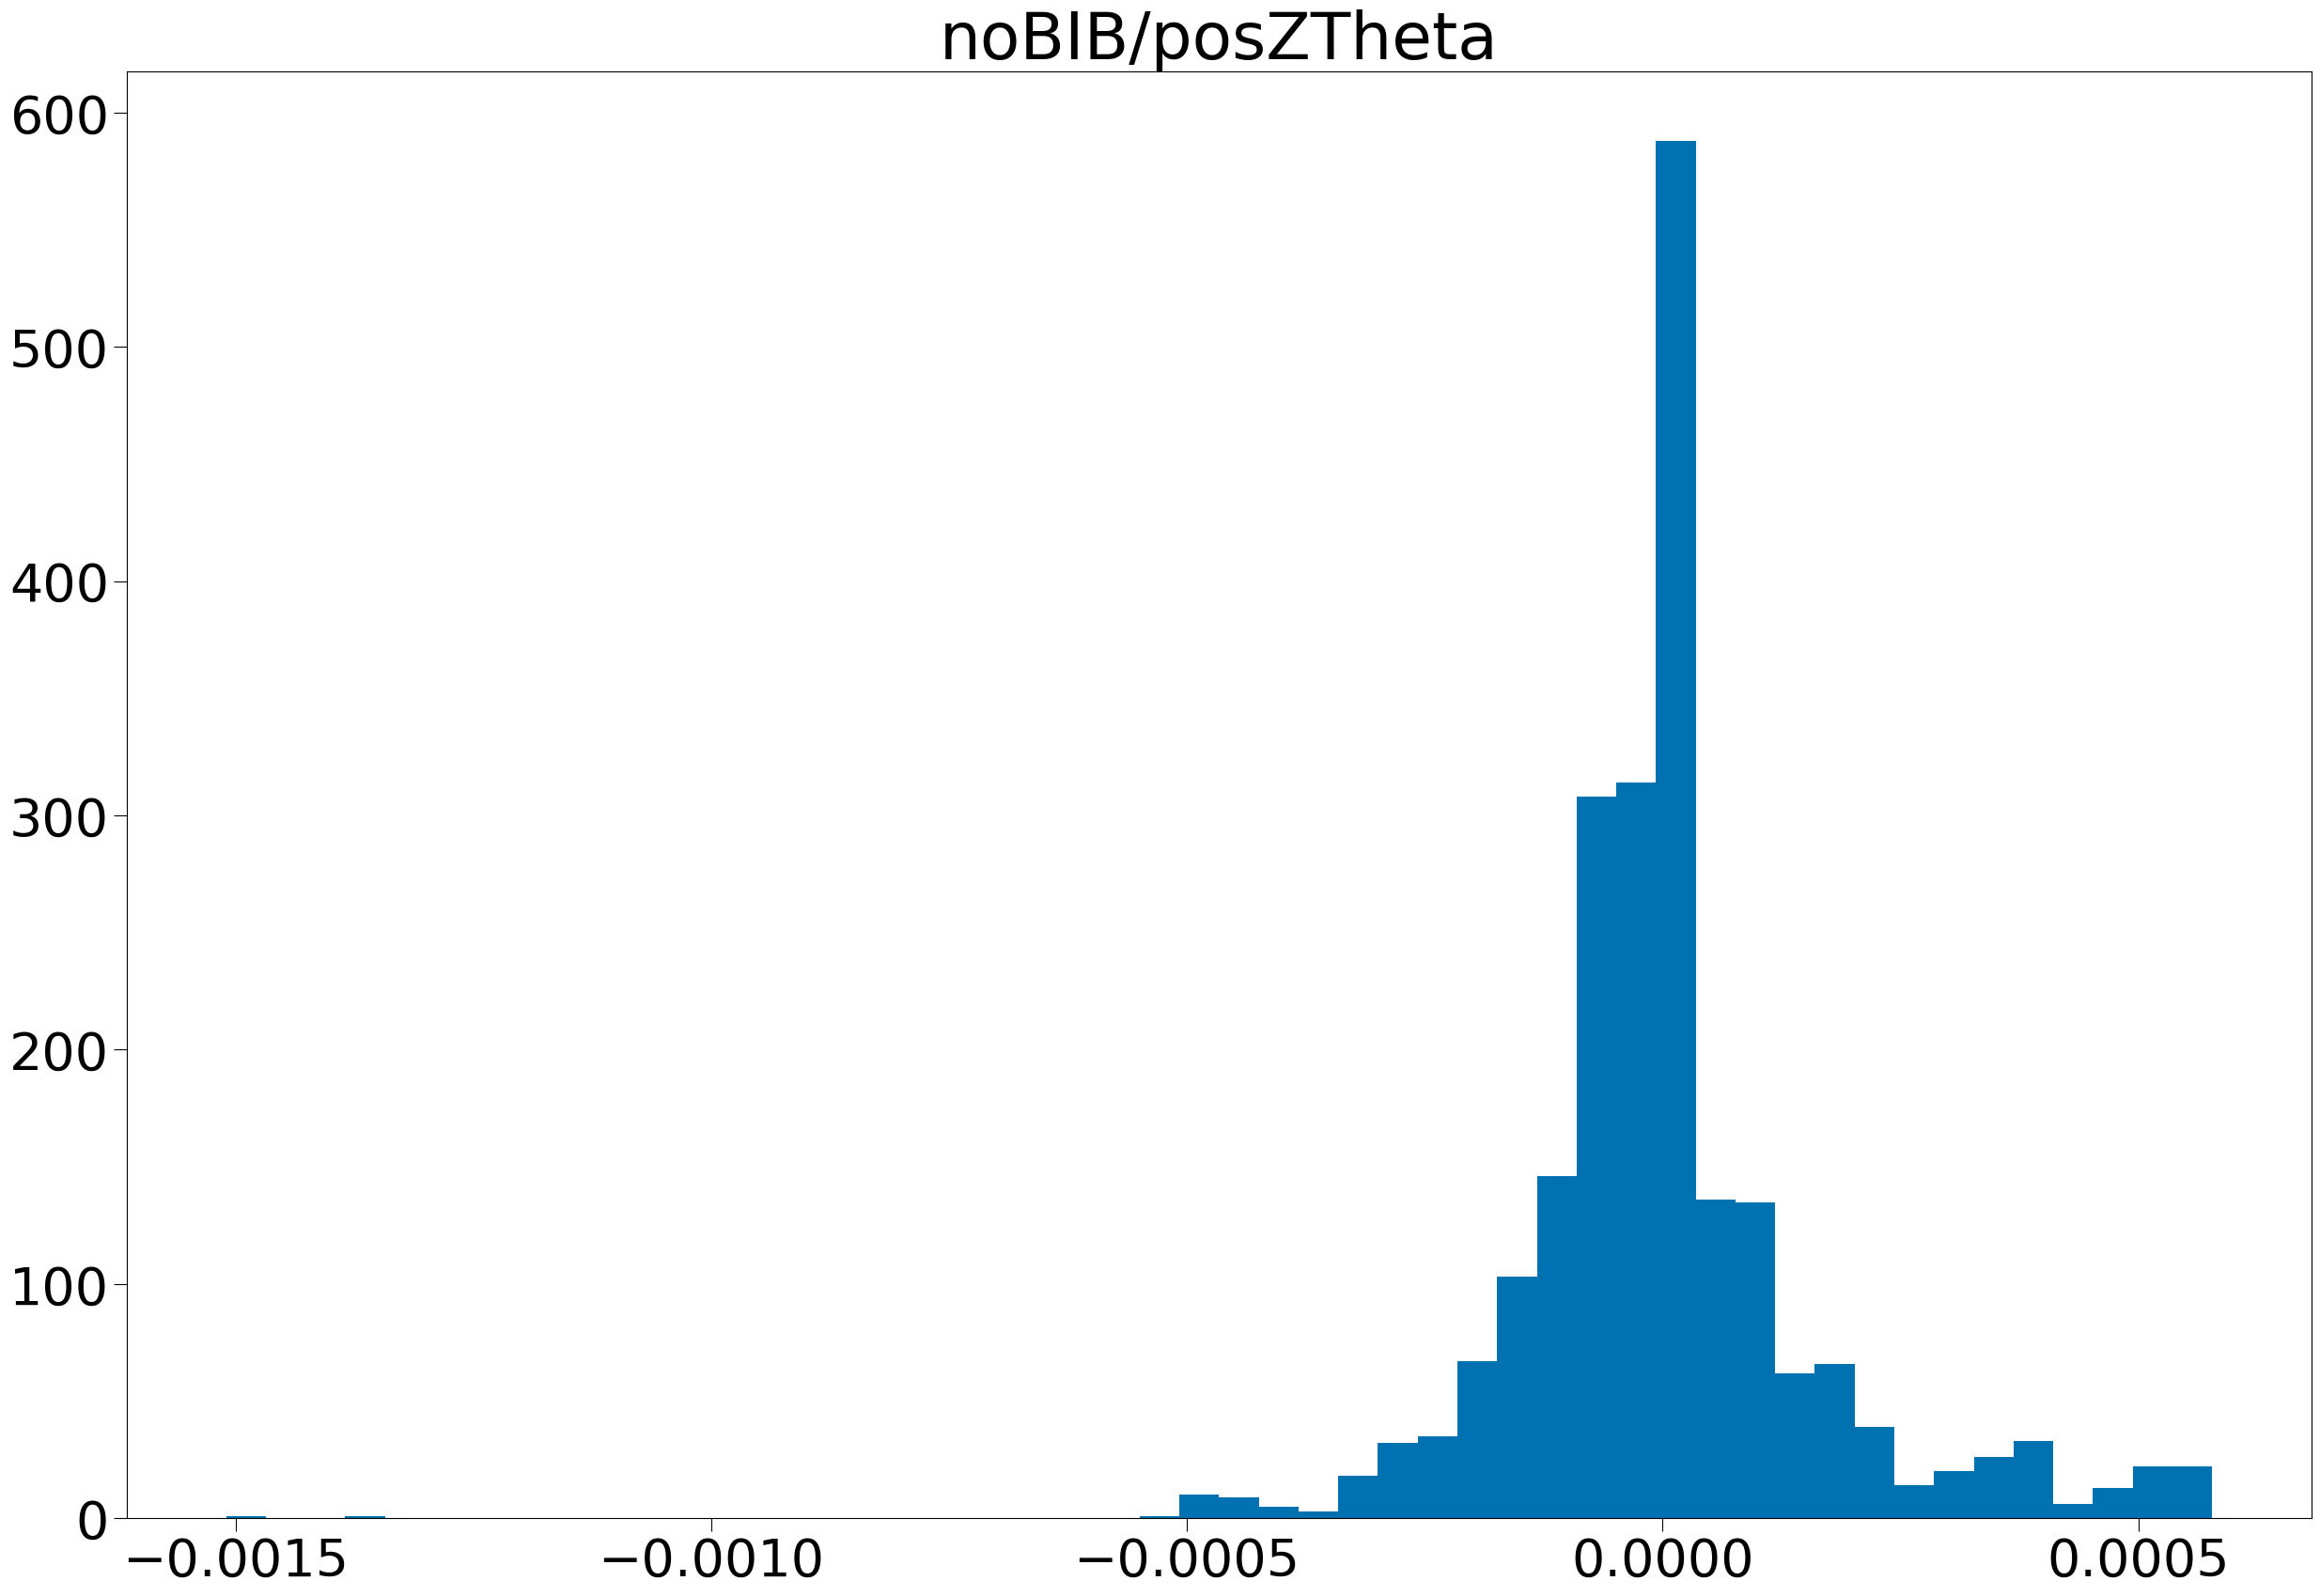

755
601
495
384


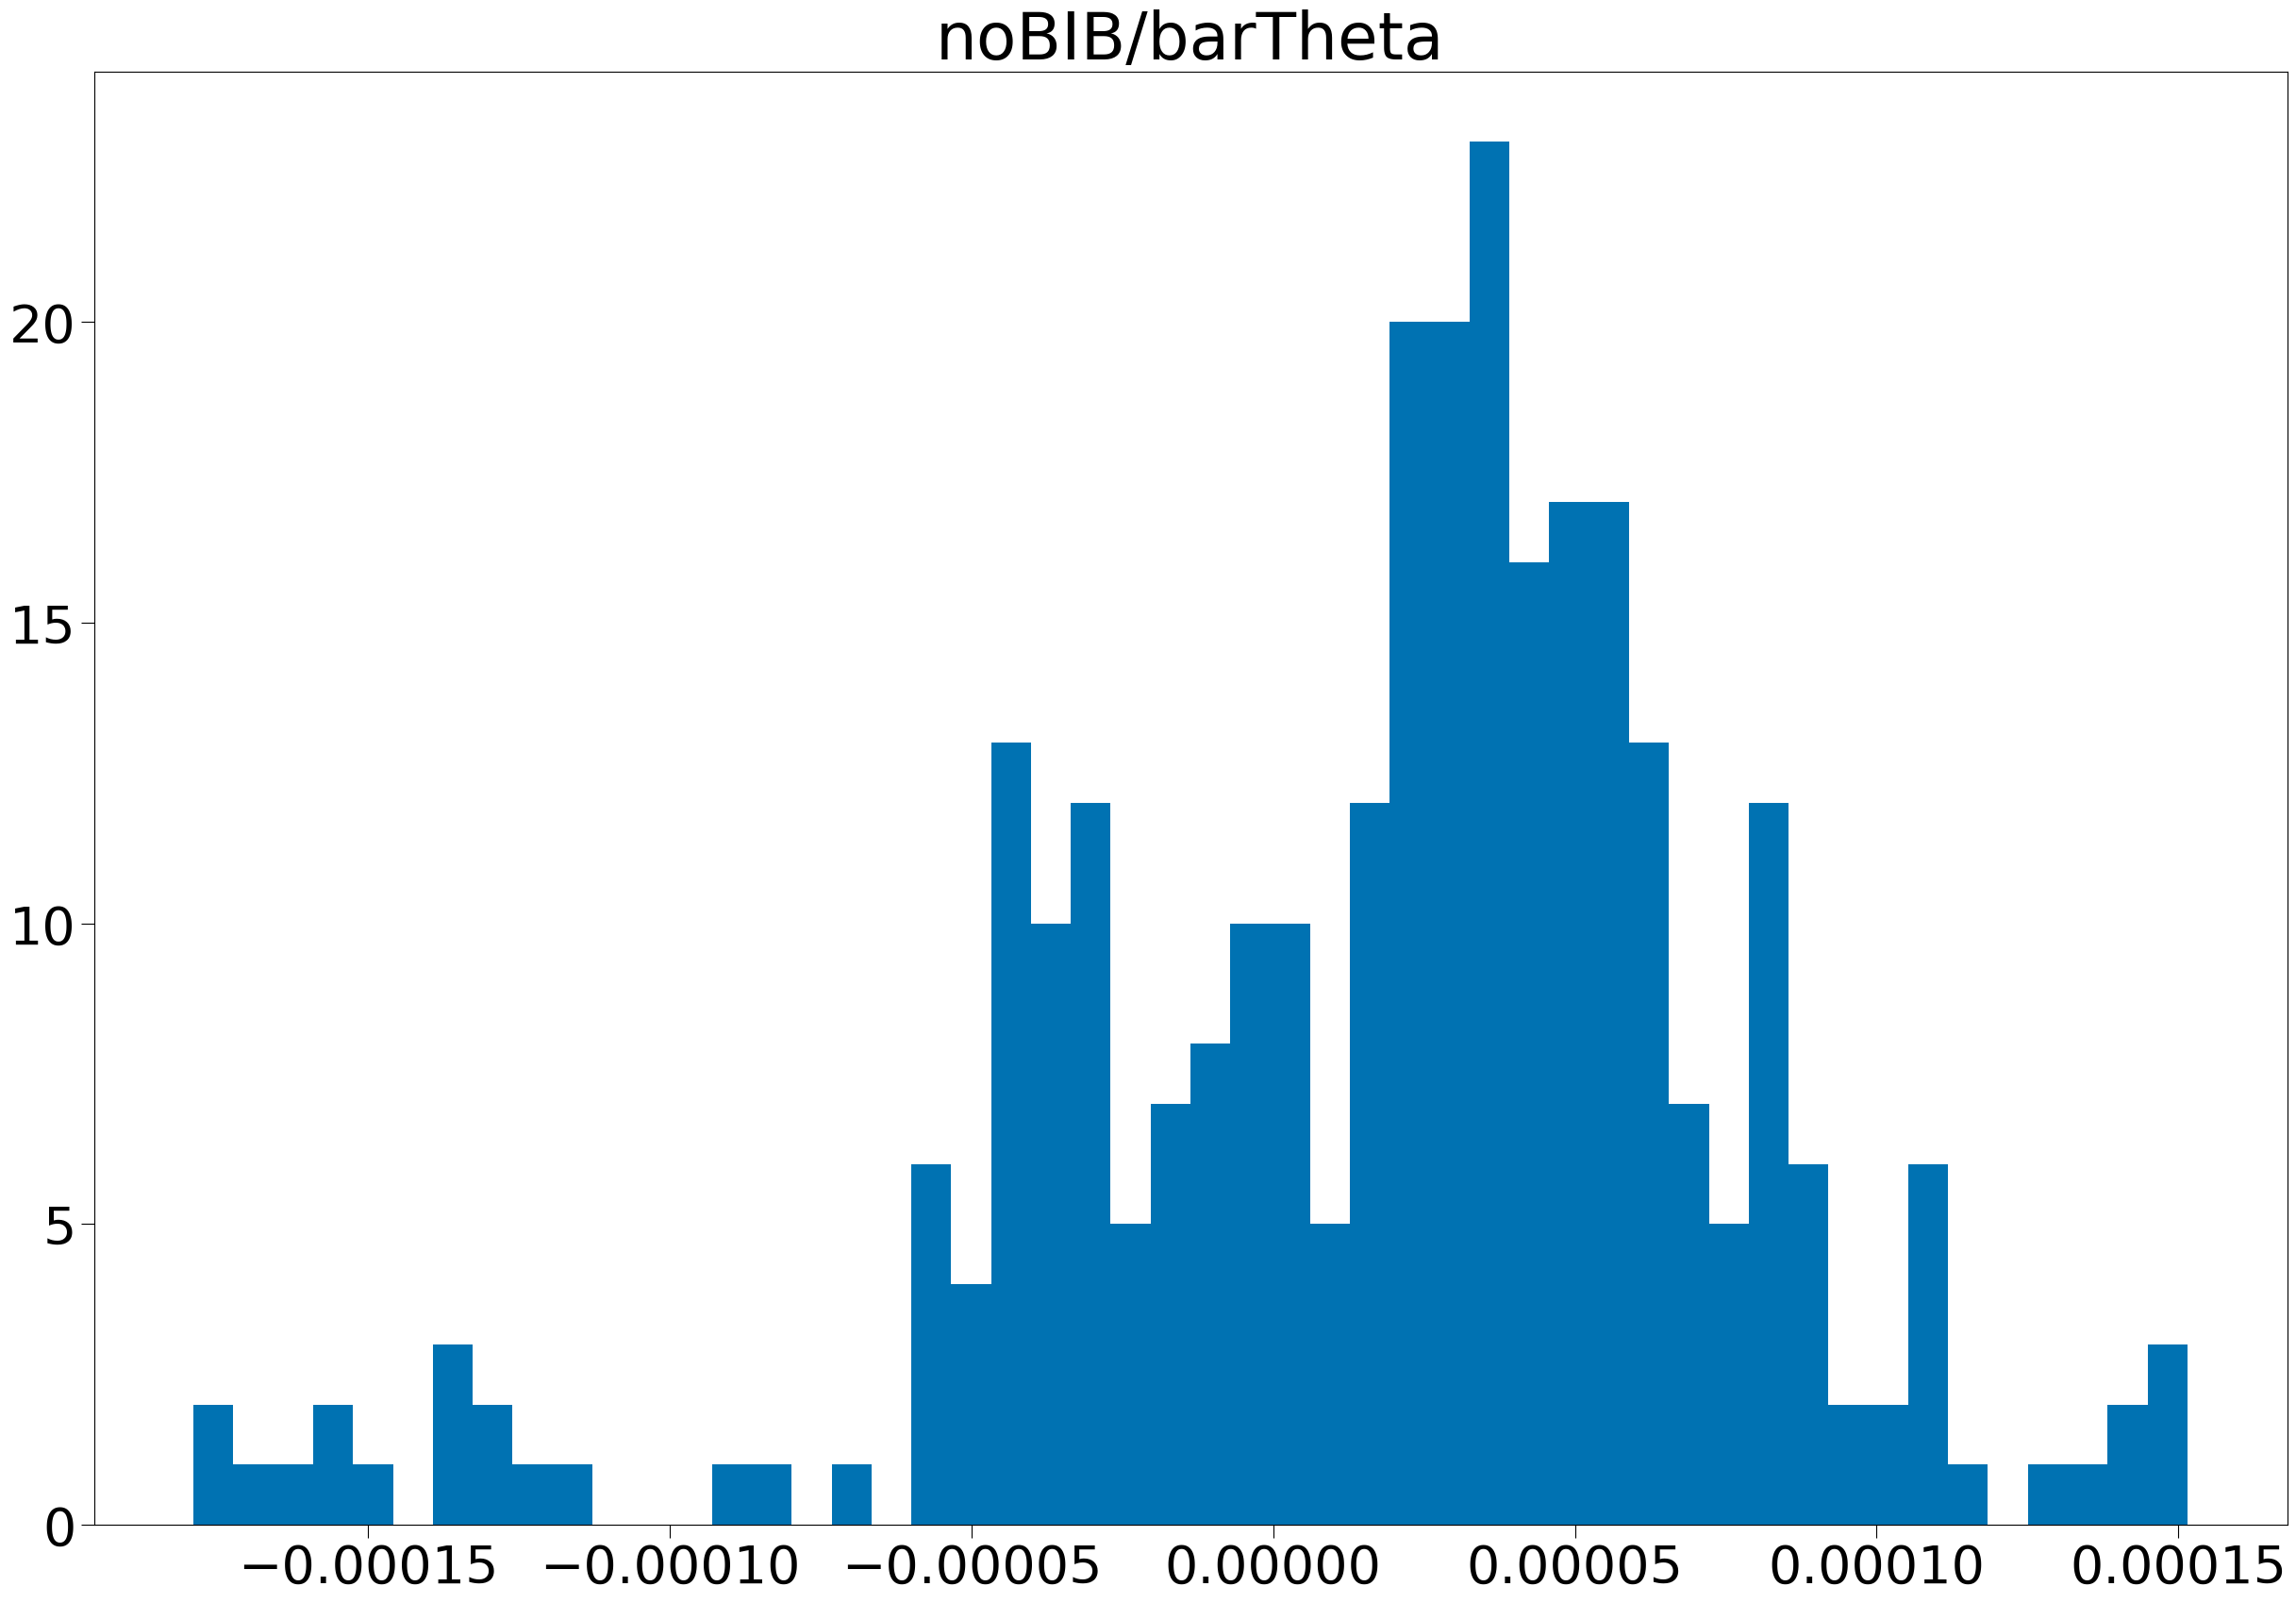

129
109
37
18


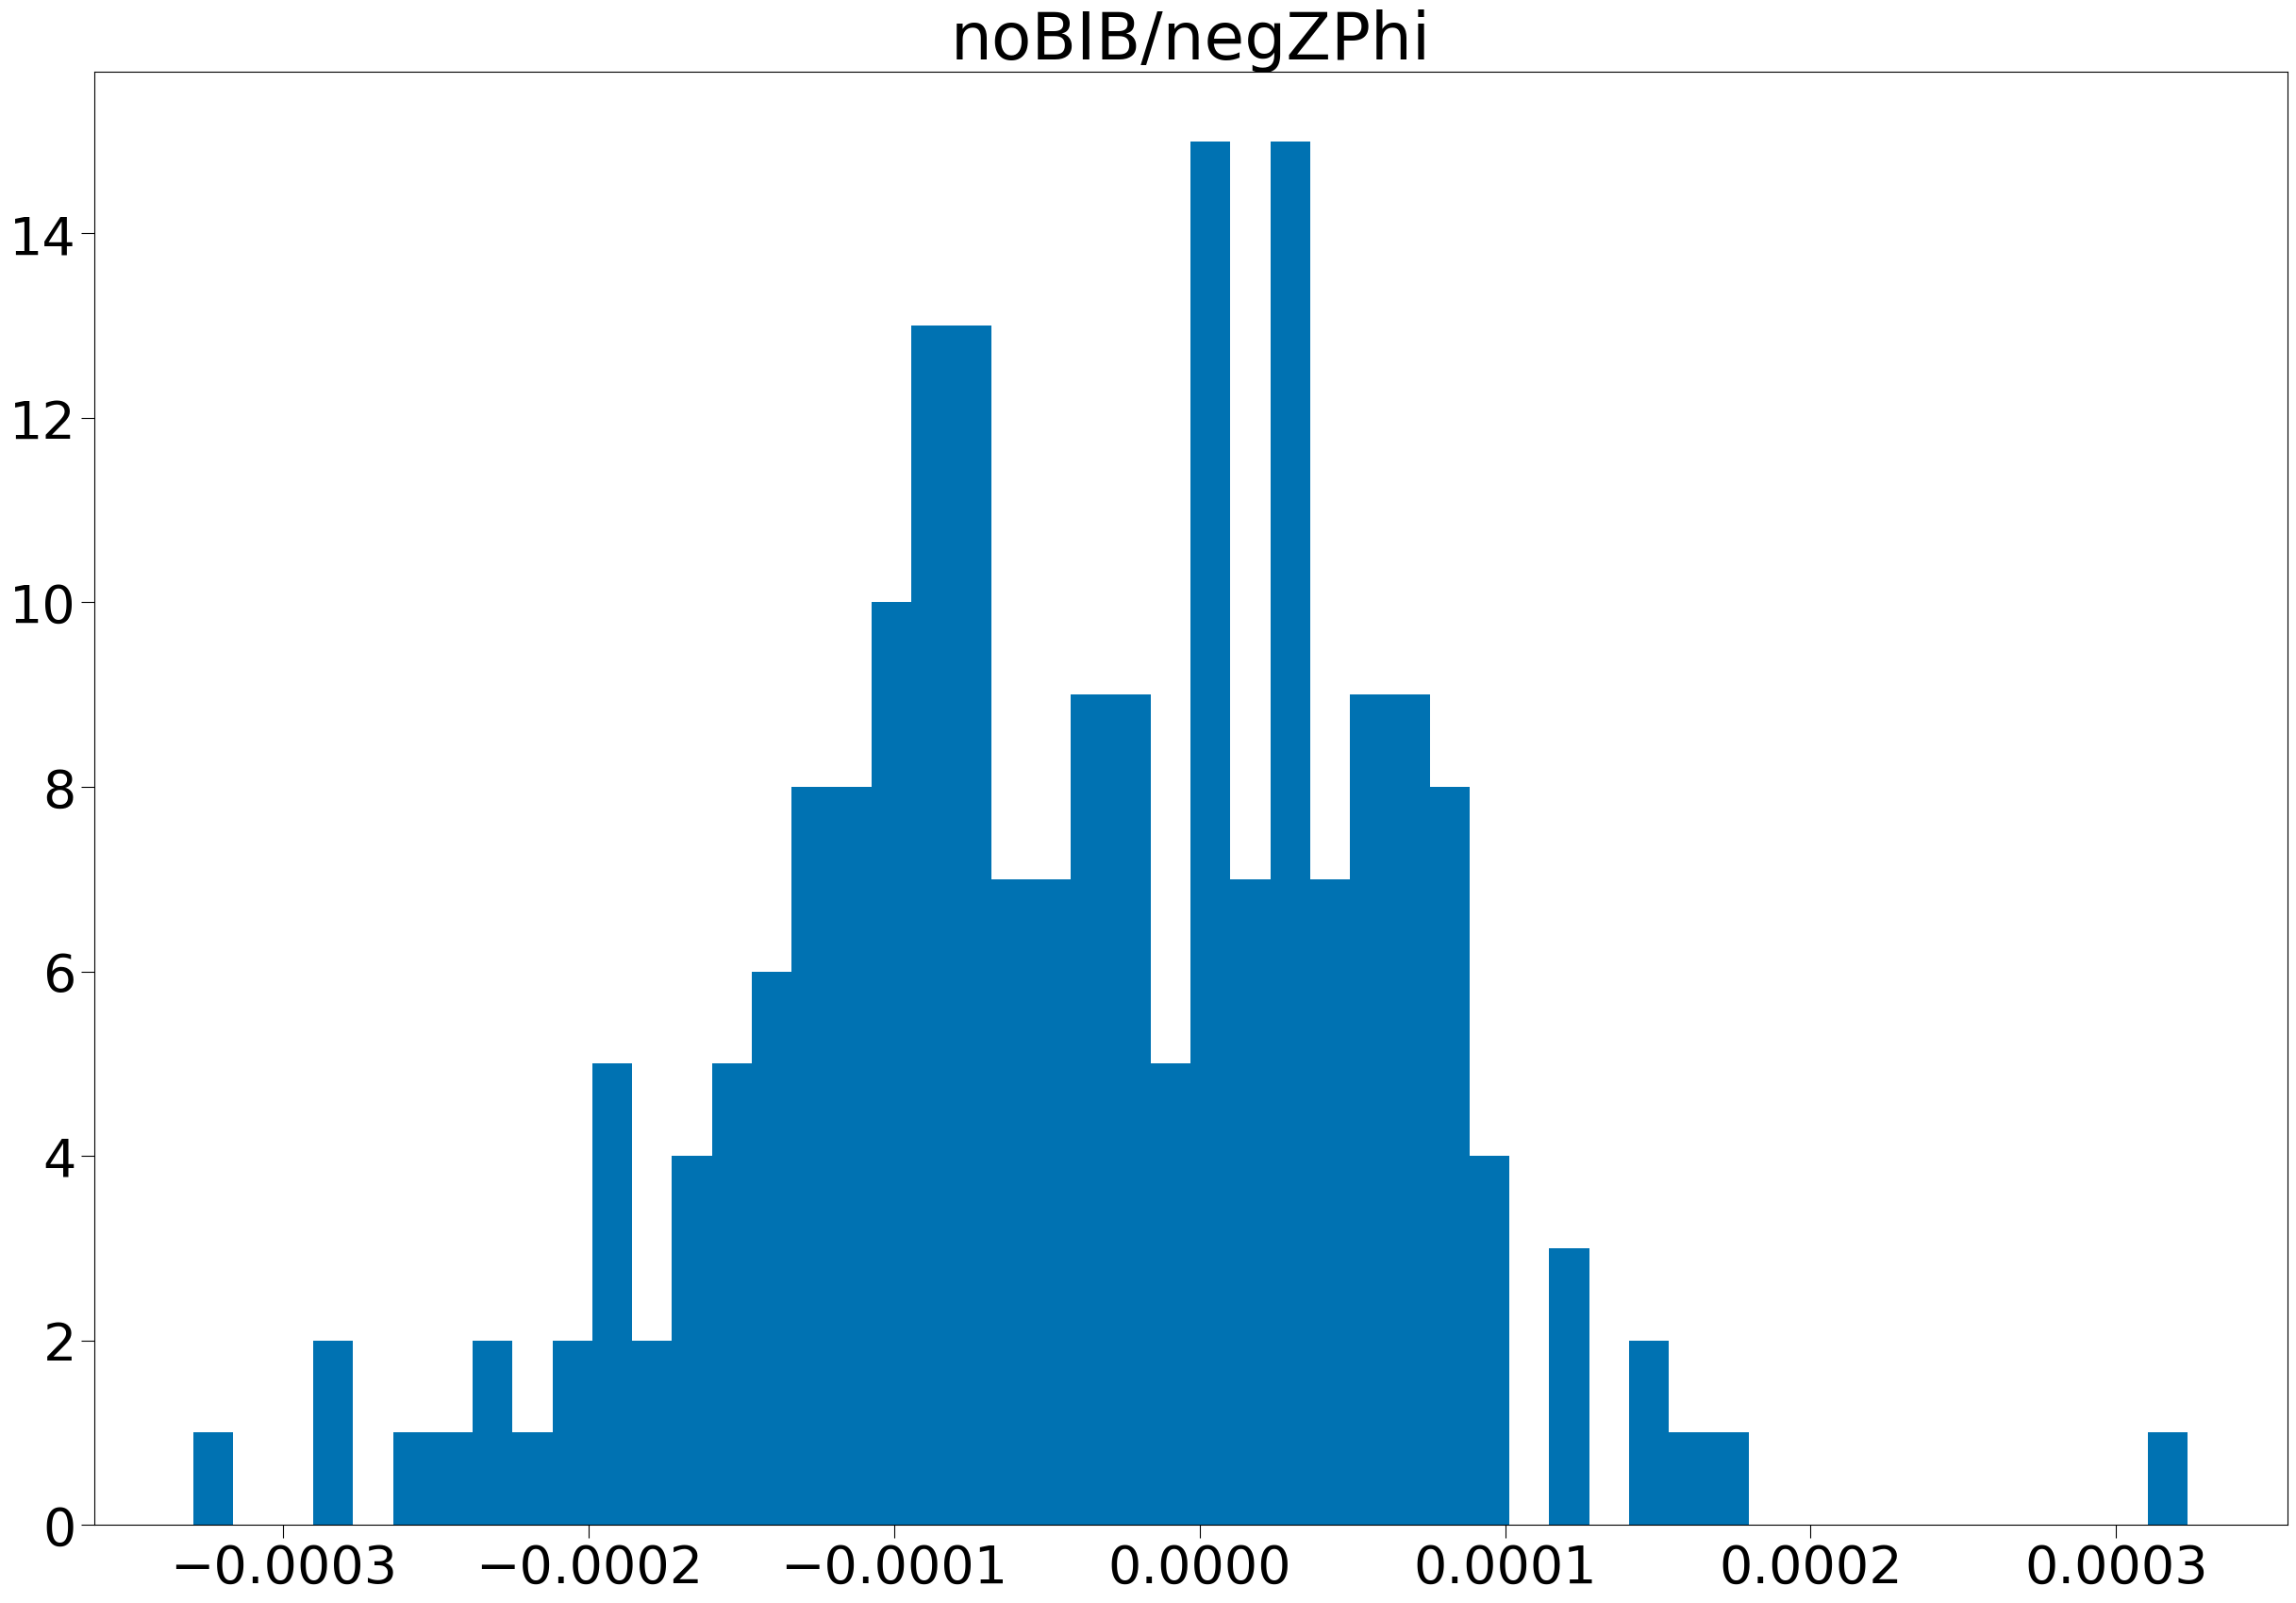

72
62
44
25


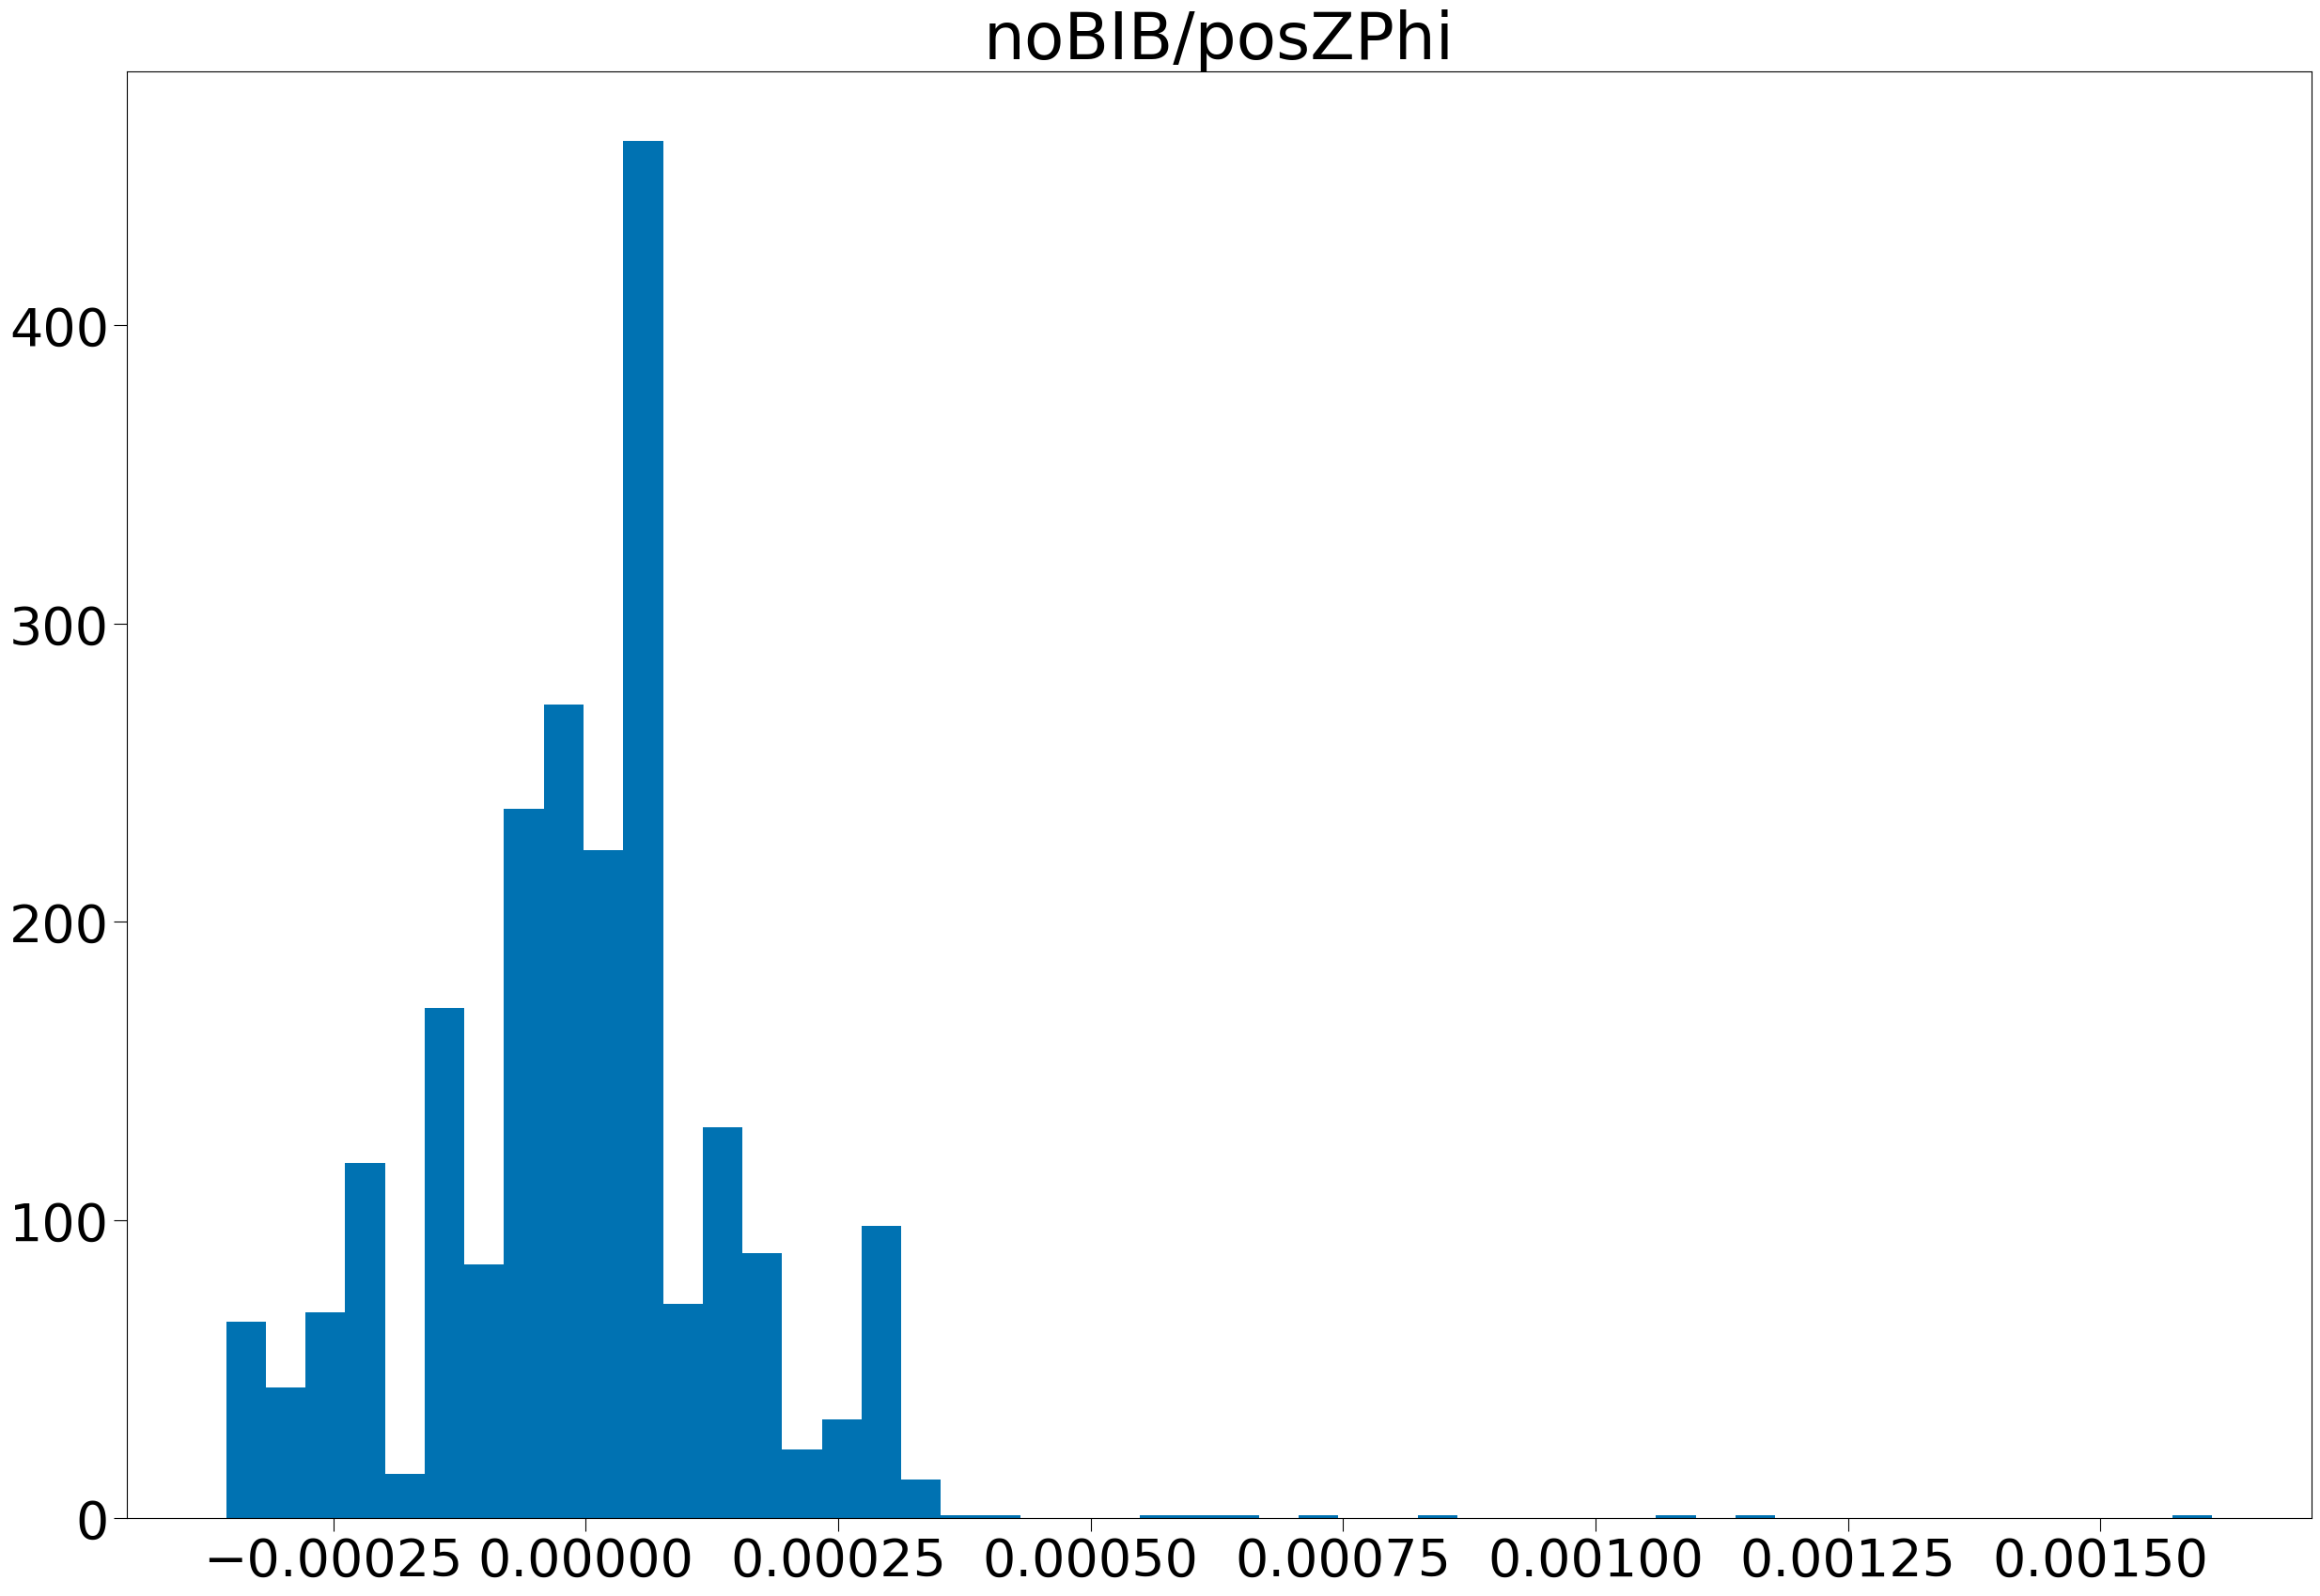

755
601
495
384


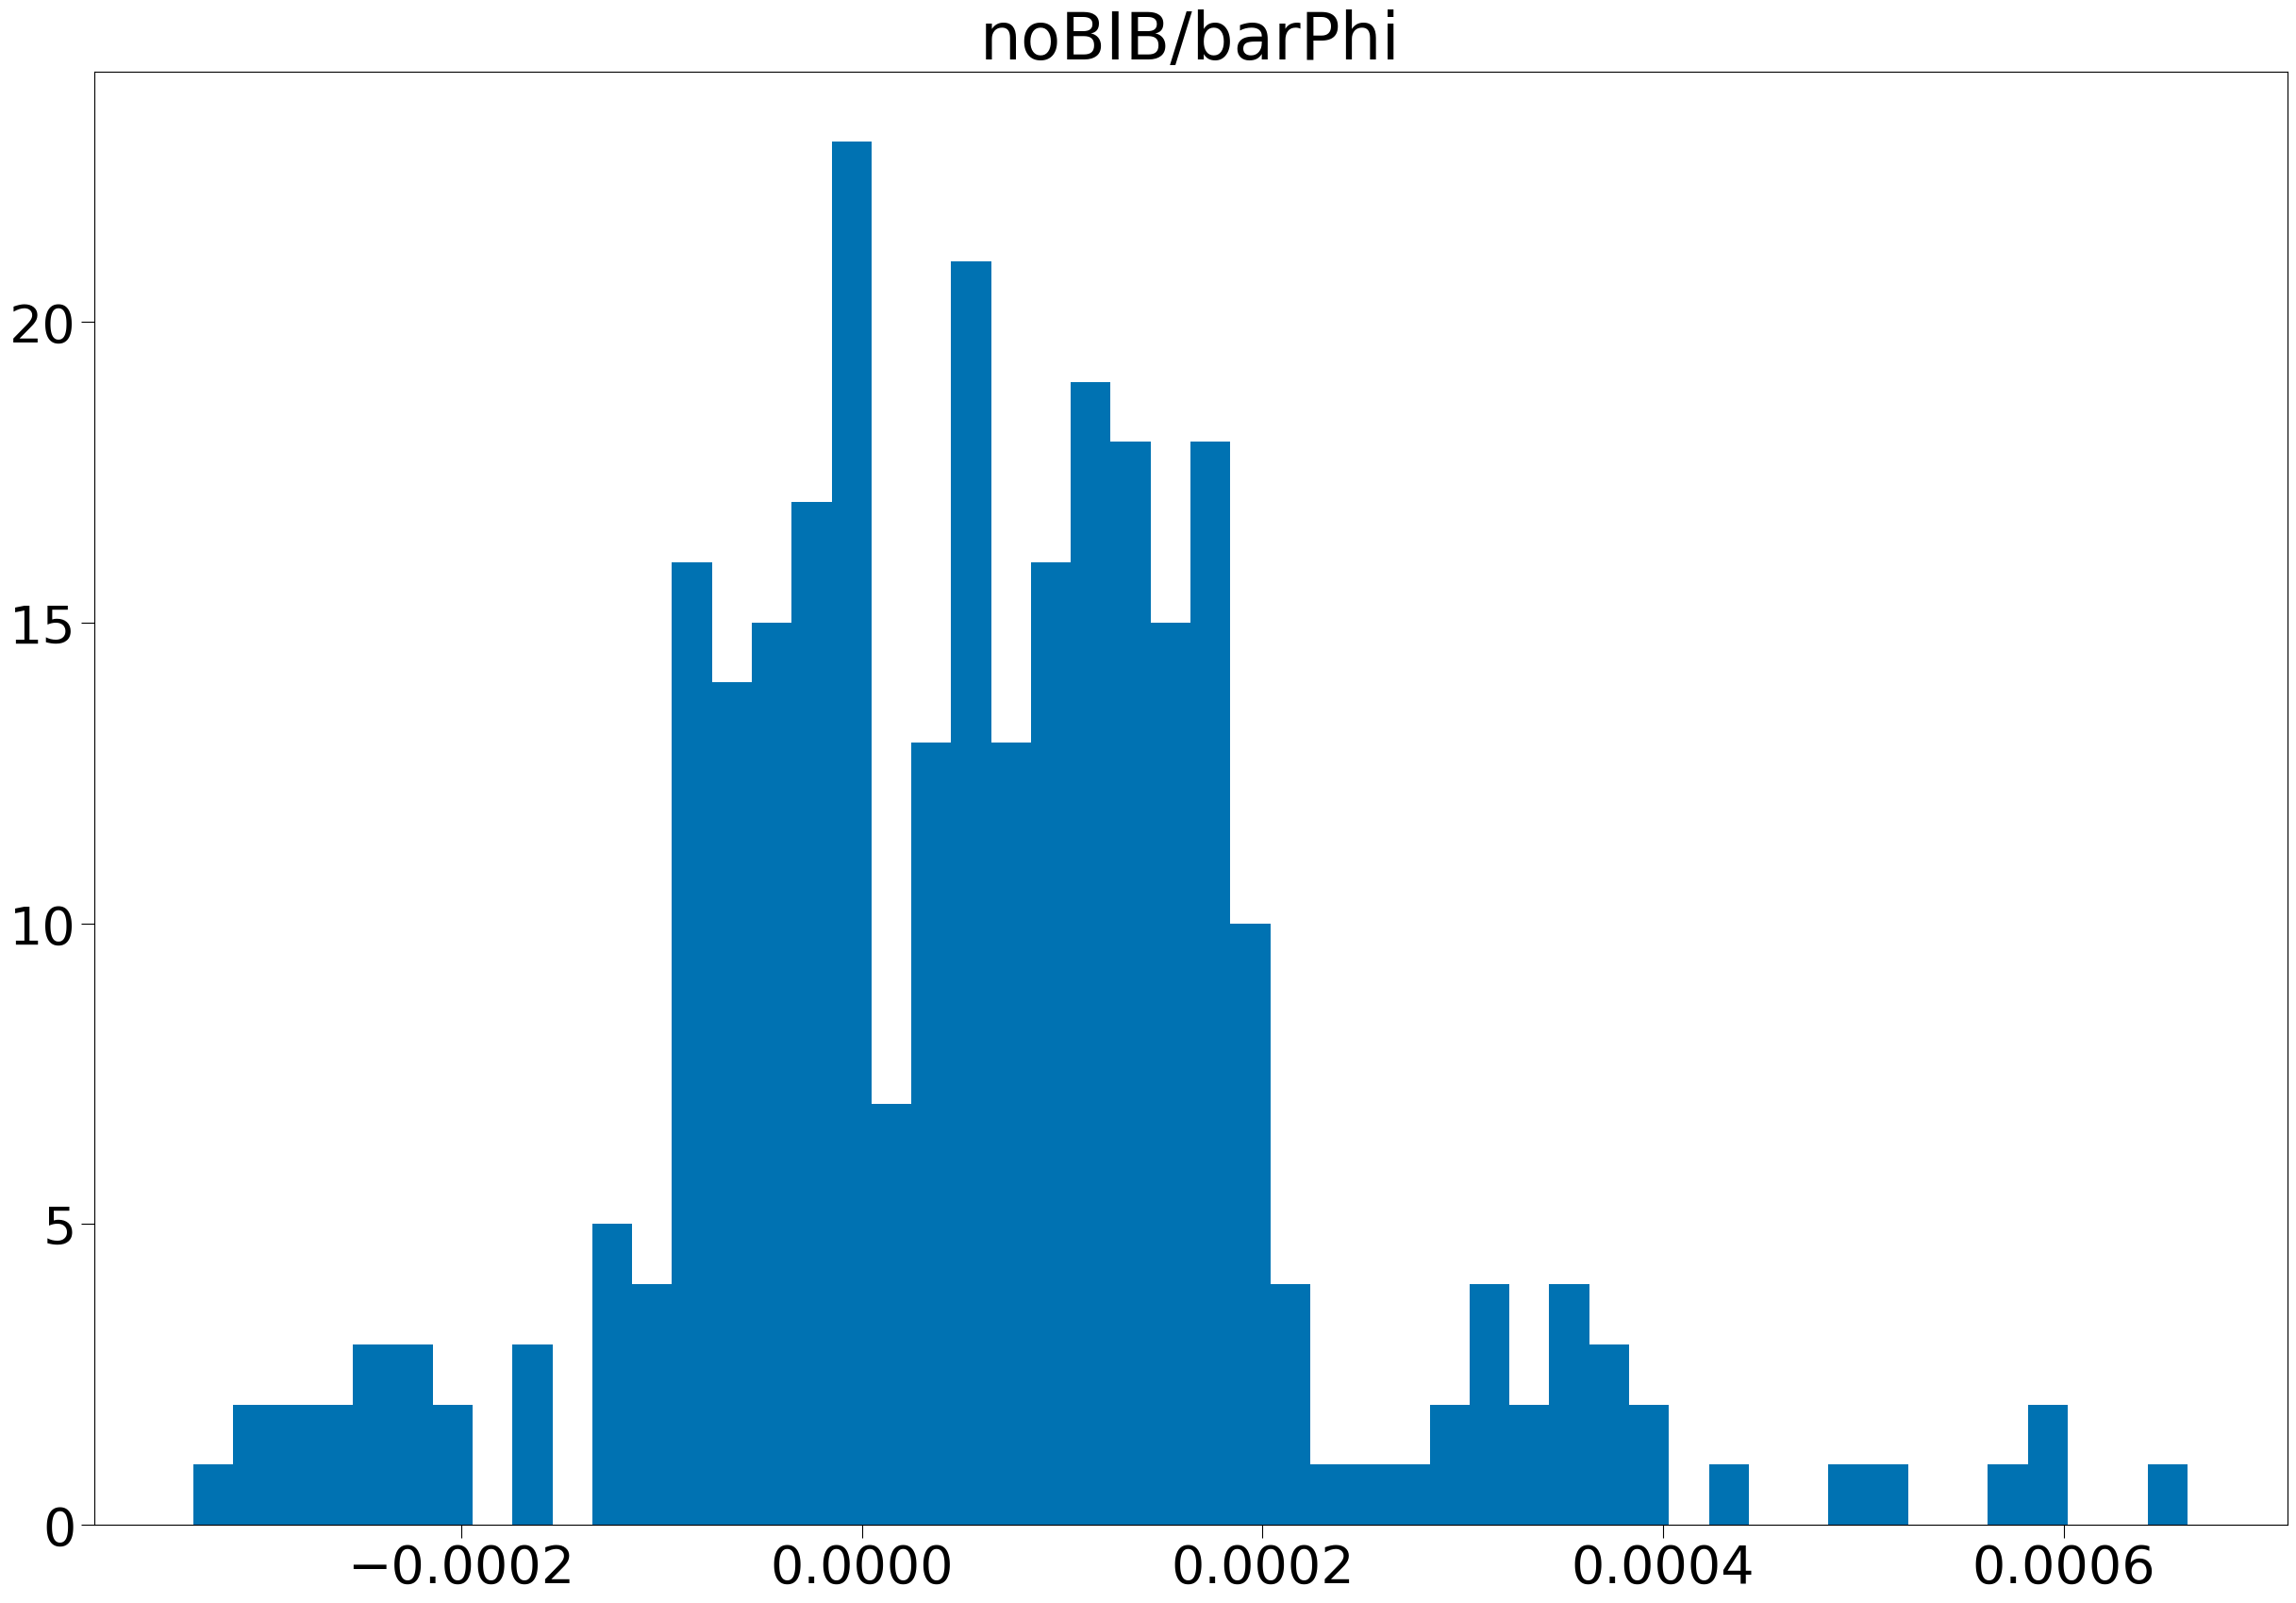

129
109
37
18


In [19]:
for i in data.keys():
    plot1DHistogram(data[i], bins=50, label=i)
    print(len(data[i][0]))
    print(len(data[i][1]))
    print(len(data[i][2]))
    print(len(data[i][3]))